# Amazon Best Selling Books - Data Exploration

# Introduction

Amazon is one of the biggest e-commerce websites in the world that started off as from a garage in Seattle. But under Bezos' careful management, the company has thrived and has expanded from selling only books to being a store where you buy almost everything, both physical and digital and it's still the largest online store for all types of books.

Amazon began operations in July 1995, advertising itself as "Earth's Biggest Bookstore" and leveraging significant book distributors and wholesalers to quickly fill its orders.

# Aim of the Project

The aim of this project is to analyze the best selling books on Amazon between 2009 and 2019. The dataset for this project was scrapped from the Amazon website and the insights we are looking forward to derive from this analysis are?

 - Distribution of Genre for the Unique Books - How many Fiction and Non Fiction Books were Best Sellers on Amazon between 2009 and 2019?
 

 - Distribution of Genre for the Unique Years - How many Fiction and Non Fiction Books were sold in each of the years?
 
 
 - Distribution of Covertype - What cover type did most of the best selling books had?
 

 -  Top 10 Authors - Based on the number of times their names appeared in the best selling listings from 2009 to 2019
 

 - The Top 10 Books - Based on the number of times the book appeared as a best selling book from 2009 to 2019


 - Relationship between Reviews and Price - do low priced books get a better review and vice versa?


 - Genre performance based on reviews - Overall did Fiction books had more ratings than Non Fiction books?


 - Relationship between price and Year - Were the cost of the books increasing or decreasing with Years?


 - Top 20 Authors with highest User Ratings


 - Top 20 Authors with highest Reviews


 - Relationship between length of book title and and User Ratings - Did Short titled books get more ratings than long titled books?


 - Top 10 Best Selling Authors based on Genre and Number of Appearances


 - Top 10 Books based on User Ratings


 - Top 10 Books Based on Reviews


 - Top 10 Best Selling Books by Genre and Number of Reviews

In [1]:
# load EDA packaes
import numpy as np
import pandas as pd

# load visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

# for word cloud creation
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from PIL import Image

# to bypass warnings
import warnings
warnings.filterwarnings('ignore')

###### importation of the scrapped data in Part 1

In [2]:
best_selling_books = pd.read_csv('best_selling_books_2009-2021.csv')   #To save to csv

In [3]:
best_selling_books

,Unnamed: 0,price,ranks,title,no_of_reviews,ratings,author,cover_type,year
0,0,12.81,1.0,The Lost Symbol,"16,129",4.4,Dan Brown,Hardcover,2009
1,1,10.43,2.0,The Shack: Where Tragedy Confronts Eternity,"23,398",4.7,William P. Young,Paperback,2009
2,2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,"5,037",4.8,Mark R. Levin,Hardcover,2009
3,3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)","16,923",4.7,Stephenie Meyer,Hardcover,2009
4,4,9.99,5.0,Going Rogue: An American Life,"1,572",4.6,Sarah Palin,Hardcover,2009
...,...,...,...,...,...,...,...,...,...
1286,1286,16.69,96.0,Will,Will Smith,4.8,NaN,Hardcover,2021
1287,1287,7.49,97.0,Think and Grow Rich: The Landmark Bestseller N...,"83,367",4.7,Napoleon Hill,Paperback,2021
1288,1288,8.95,98.0,Dragons Love Tacos,"15,771",4.8,Adam Rubin,Hardcover,2021
1289,1289,7.49,99.0,The Truth About COVID-19: Exposing The Great R...,Doctor Joseph Mercola,4.8,NaN,Hardcover,2021


###### categorization of the books

It happened that Amazon do not have a definite categorization of books on their website as one book can be found in different departments which is a way they used to group their books.

The different departments they had include Arts & Photography, Biographies & Memoirs, Books on CD, Business & Money, Children's Books, Christian Books & Bibles, Comics & Graphic Novels, e.t.c. And one book can be found in more than one category.

Due to this problem, I had to use information from [Goodreads](https://www.goodreads.com/), the world's largest site for readers and book recommendations to group the books into two disntinct categories.

I added a new column called **genre** to the scrapped data and I categorized the book based on **Fiction** and **Non Fiction.**

In [4]:
# The dataset was curated with Excel with information gotten from Goodreads
amazon_best_sellers = pd.read_excel('best_selling_books_2009-2021_with_categories.xlsx')
amazon_best_sellers

,Unnamed: 0,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,0,12.49,1.0,The Lost Symbol,16118,4.4,Dan Brown,Hardcover,2009,Fiction
1,1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,23392,4.7,William P. Young,Paperback,2009,Fiction
2,2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,5036,4.8,Mark R. Levin,Hardcover,2009,Non Fiction
3,3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",16912,4.7,Stephenie Meyer,Hardcover,2009,Fiction
4,4,9.99,5.0,Going Rogue: An American Life,1572,4.6,Sarah Palin,Hardcover,2009,Non Fiction
...,...,...,...,...,...,...,...,...,...,...
1286,1286,16.69,96.0,Will,Will Smith,4.8,NaN,Hardcover,2021,unknown
1287,1287,7.49,97.0,Think and Grow Rich: The Landmark Bestseller N...,79872,4.7,Napoleon Hill,Paperback,2021,unknown
1288,1288,8.95,98.0,Dragons Love Tacos,15753,4.8,Adam Rubin,Hardcover,2021,unknown
1289,1289,7.59,99.0,The Truth About COVID-19: Exposing The Great R...,Doctor Joseph Mercola,4.8,NaN,Hardcover,2021,unknown


# Assessing the Data

In [5]:
amazon_best_sellers.shape

(1291, 10)

In [6]:
amazon_best_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1291 non-null   int64  
 1   price          1287 non-null   float64
 2   ranks          1287 non-null   float64
 3   title          1284 non-null   object 
 4   no_of_reviews  1285 non-null   object 
 5   ratings        1287 non-null   float64
 6   author         1268 non-null   object 
 7   cover_type     1286 non-null   object 
 8   year           1291 non-null   int64  
 9   genre          1291 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 101.0+ KB


In [7]:
amazon_best_sellers.describe()

,Unnamed: 0,price,ranks,ratings,year
count,1291.000000,1287.000000,1287.000000,1287.000000,1291.000000
mean,645.000000,13.757117,50.246309,4.650894,2015.027111
std,372.823908,10.046391,28.803308,0.197174,3.734404
min,0.000000,1.170000,1.000000,3.400000,2009.000000
25%,322.500000,8.550000,25.000000,4.600000,2012.000000
50%,645.000000,12.100000,50.000000,4.700000,2015.000000
75%,967.500000,16.290000,75.000000,4.800000,2018.000000
max,1290.000000,144.000000,100.000000,4.900000,2021.000000


In [8]:
amazon_best_sellers.columns

Index(['Unnamed: 0', 'price', 'ranks', 'title', 'no_of_reviews', 'ratings',
       'author', 'cover_type', 'year', 'genre'],
      dtype='object')

In [9]:
amazon_best_sellers['year'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021], dtype=int64)

In [10]:
amazon_best_sellers['genre'].unique()

array(['Fiction', 'Non Fiction', 'unknown'], dtype=object)

In [11]:
amazon_best_sellers['ranks'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,
        58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,
        69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,
        80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
        91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,  49., 100.,
        50.,  nan])

In [12]:
amazon_best_sellers['cover_type'].unique()

array(['Hardcover', 'Paperback', 'Mass Market Paperback', 'Spiral-bound',
       nan, 'Board book', 'Printed Access Code', 'Pamphlet', 'Cards'],
      dtype=object)

In [13]:
amazon_best_sellers.duplicated().sum()

0

In [14]:
amazon_best_sellers.isnull().sum()

Unnamed: 0        0
price             4
ranks             4
title             7
no_of_reviews     6
ratings           4
author           23
cover_type        5
year              0
genre             0
dtype: int64

###### Issues from our data exploration steps with pandas

 - unwanted column named 'Unamed:0'
 
 - extra data (i.e data for 2020 and 2021)
 
 - price, title no_of_reviews, and author columns have missing values 
    
 - ranks column is in float instead of int data type

 - no_of_reviews is in object data type instead of object data type instead of int

# Cleaning the Data

In [15]:
# before we start cleaning our data, we make a copy of the original data
best_sellers = amazon_best_sellers.copy()

Before I started this cleaning steps, I did go to the websites to observe these missing rows, and I was able to fill in some of these missing values from the website.  The ones whose information I couldn't fill in are what we are going to take care of here.

## Issue 1

###### Define: Delete the column named 'Unnamed: 0'

##### Code

In [16]:
# deleting the unwanted column
del best_sellers['Unnamed: 0']

###### Test

In [17]:
best_sellers.columns

Index(['price', 'ranks', 'title', 'no_of_reviews', 'ratings', 'author',
       'cover_type', 'year', 'genre'],
      dtype='object')

## issue 2

###### Define: Delete the data for 2020 and 2021

###### Code

In [18]:
#best_sellers.loc[best_sellers['year'] == 2020 & 2021]

In [19]:
# list that contains year 2020 and 2021
list = [2020, 2021]

# drop rows from the above list
best_sellers = best_sellers[~best_sellers.year.isin(list) == True]
best_sellers

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,12.49,1.0,The Lost Symbol,16118,4.4,Dan Brown,Hardcover,2009,Fiction
1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,23392,4.7,William P. Young,Paperback,2009,Fiction
2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,5036,4.8,Mark R. Levin,Hardcover,2009,Non Fiction
3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",16912,4.7,Stephenie Meyer,Hardcover,2009,Fiction
4,9.99,5.0,Going Rogue: An American Life,1572,4.6,Sarah Palin,Hardcover,2009,Non Fiction
...,...,...,...,...,...,...,...,...,...
1086,4.99,96.0,How to Draw 101 Animals (1),24653,4.7,Dan Green,Paperback,2019,Non Fiction
1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,unknown
1088,15.90,98.0,Simply Keto: A Practical Approach to Health & ...,9484,4.6,Suzanne Ryan,Paperback,2019,Non Fiction
1089,9.49,99.0,The Outsiders,30584,4.8,S. E. Hinton,Paperback,2019,Fiction


###### Test

In [20]:
best_sellers['year'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [21]:
best_sellers.isnull().sum()

price            4
ranks            4
title            6
no_of_reviews    4
ratings          4
author           5
cover_type       5
year             0
genre            0
dtype: int64

## isuue 3

###### Define: After observing the websites, I realized that 

 - all the remaining missing values are related to the missing values in the title column. The missing titles are because those books are no longer available on the website. 
 
 - one product wasn't a book but an eclipse glasses
  
So we will drop the NaN values in the title column from the dataframe

###### Code

In [22]:
# let's look at the percentages of missing values again
misssing_percent= best_sellers.isnull().mean().round(2) * 100
misssing_percent_df = pd.DataFrame(misssing_percent, columns=['missing values'])
misssing_percent_df

,missing values
price,0.0
ranks,0.0
title,1.0
no_of_reviews,0.0
ratings,0.0
author,0.0
cover_type,0.0
year,0.0
genre,0.0


We observe that those percentage of missing values are not more than one percent, so it's still safe as the rows aren't useful for our analysis.

In [23]:
# best_sellers = best_sellers.dropna(subset=['price', 'title', 'no_of_reviews', 'author'])
# best_sellers

In [24]:
best_sellers = best_sellers.dropna(subset=['title'])
best_sellers

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,12.49,1.0,The Lost Symbol,16118,4.4,Dan Brown,Hardcover,2009,Fiction
1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,23392,4.7,William P. Young,Paperback,2009,Fiction
2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,5036,4.8,Mark R. Levin,Hardcover,2009,Non Fiction
3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",16912,4.7,Stephenie Meyer,Hardcover,2009,Fiction
4,9.99,5.0,Going Rogue: An American Life,1572,4.6,Sarah Palin,Hardcover,2009,Non Fiction
...,...,...,...,...,...,...,...,...,...
1085,5.98,95.0,There's No Place Like Space: All About Our Sol...,24728,4.8,Tish Rabe,Hardcover,2019,Non Fiction
1086,4.99,96.0,How to Draw 101 Animals (1),24653,4.7,Dan Green,Paperback,2019,Non Fiction
1088,15.90,98.0,Simply Keto: A Practical Approach to Health & ...,9484,4.6,Suzanne Ryan,Paperback,2019,Non Fiction
1089,9.49,99.0,The Outsiders,30584,4.8,S. E. Hinton,Paperback,2019,Fiction


In [25]:
best_sellers.isnull().sum()

price            0
ranks            0
title            0
no_of_reviews    0
ratings          0
author           0
cover_type       0
year             0
genre            0
dtype: int64

we do not have any nmissing values anymore.

In [26]:
# let's check the data types of our columns
best_sellers.dtypes

price            float64
ranks            float64
title             object
no_of_reviews     object
ratings          float64
author            object
cover_type        object
year               int64
genre             object
dtype: object

## issue 4

###### Define: Convert ranks column from float to int

###### Code

In [27]:
best_sellers.ranks = best_sellers.ranks.apply(int)  # round instead of int is you prefer to round
best_sellers

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,12.49,1,The Lost Symbol,16118,4.4,Dan Brown,Hardcover,2009,Fiction
1,13.40,2,The Shack: Where Tragedy Confronts Eternity,23392,4.7,William P. Young,Paperback,2009,Fiction
2,9.93,3,Liberty and Tyranny: A Conservative Manifesto,5036,4.8,Mark R. Levin,Hardcover,2009,Non Fiction
3,14.30,4,"Breaking Dawn (The Twilight Saga, Book 4)",16912,4.7,Stephenie Meyer,Hardcover,2009,Fiction
4,9.99,5,Going Rogue: An American Life,1572,4.6,Sarah Palin,Hardcover,2009,Non Fiction
...,...,...,...,...,...,...,...,...,...
1085,5.98,95,There's No Place Like Space: All About Our Sol...,24728,4.8,Tish Rabe,Hardcover,2019,Non Fiction
1086,4.99,96,How to Draw 101 Animals (1),24653,4.7,Dan Green,Paperback,2019,Non Fiction
1088,15.90,98,Simply Keto: A Practical Approach to Health & ...,9484,4.6,Suzanne Ryan,Paperback,2019,Non Fiction
1089,9.49,99,The Outsiders,30584,4.8,S. E. Hinton,Paperback,2019,Fiction


In [28]:
best_sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1090
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1085 non-null   float64
 1   ranks          1085 non-null   int64  
 2   title          1085 non-null   object 
 3   no_of_reviews  1085 non-null   object 
 4   ratings        1085 non-null   float64
 5   author         1085 non-null   object 
 6   cover_type     1085 non-null   object 
 7   year           1085 non-null   int64  
 8   genre          1085 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 84.8+ KB


## issue 5

###### Define: convert no_of_reviews column from object to int data type

###### Code

In [29]:
best_sellers['no_of_reviews'] = best_sellers['no_of_reviews'].astype(int)

###### Test

In [30]:
best_sellers.dtypes

price            float64
ranks              int64
title             object
no_of_reviews      int32
ratings          float64
author            object
cover_type        object
year               int64
genre             object
dtype: object

# Exploratory Data Analysis

## Univariate Analysis

### Distribution of Genre for the Unique Books

In [31]:
# Getting the value count of each genre variable in a dataframe
pd.DataFrame(best_sellers['genre'].value_counts())

,genre
Non Fiction,606
Fiction,479


In [32]:
# Getting the percentage of each gender value counts
pd.DataFrame(best_sellers['genre'].value_counts(normalize=True)*100)

,genre
Non Fiction,55.852535
Fiction,44.147465


In [33]:
# plotting the distribution of Genre with pie chart

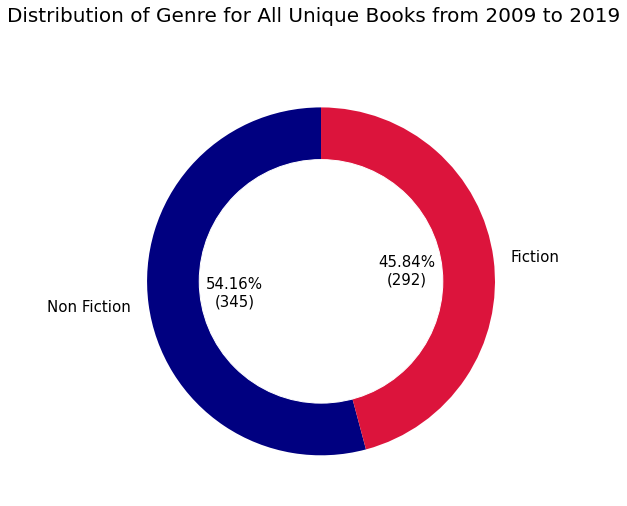

In [34]:
no_duplicate = best_sellers.drop_duplicates('title')
g_count = no_duplicate['genre'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col = ['navy','crimson']
#genre_col = ['khaki','plum']

center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(x=g_count.values, labels=g_count.index, autopct=make_autopct(g_count.values), 
          startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=genre_col)
ax.add_artist(center_circle)

fig.suptitle('Distribution of Genre for All Unique Books from 2009 to 2019', fontsize=20)
fig.show()

It is observed that Amazon had more Non-Fiction books which were best sellers between 2009 and 2019.

### Distribution of Genre for the Unique Years

In [35]:
# pie chart comparing fiction and non fiction total
nonfic = len(best_sellers[best_sellers.genre =='Non Fiction'])
fic = len(best_sellers[best_sellers.genre =='Fiction'])
data = [nonfic,fic]

In [36]:
pd.DataFrame(best_sellers.groupby(best_sellers.year).genre.value_counts())

genre
year genre             
2009 Fiction         49
     Non Fiction     48
2010 Non Fiction     55
     Fiction         42
2011 Non Fiction     56
     Fiction         43
2012 Non Fiction     59
     Fiction         40
2013 Non Fiction     59
     Fiction         41
2014 Fiction         56
     Non Fiction     42
2015 Non Fiction     60
     Fiction         40
2016 Non Fiction     52
     Fiction         46
2017 Non Fiction     56
     Fiction         43
2018 Non Fiction     59
     Fiction         40
2019 Non Fiction     60
     Fiction         39

In [37]:
pd.DataFrame(best_sellers.groupby(best_sellers.year).genre.value_counts(normalize = True))

genre
year genre                
2009 Fiction      0.505155
     Non Fiction  0.494845
2010 Non Fiction  0.567010
     Fiction      0.432990
2011 Non Fiction  0.565657
     Fiction      0.434343
2012 Non Fiction  0.595960
     Fiction      0.404040
2013 Non Fiction  0.590000
     Fiction      0.410000
2014 Fiction      0.571429
     Non Fiction  0.428571
2015 Non Fiction  0.600000
     Fiction      0.400000
2016 Non Fiction  0.530612
     Fiction      0.469388
2017 Non Fiction  0.565657
     Fiction      0.434343
2018 Non Fiction  0.595960
     Fiction      0.404040
2019 Non Fiction  0.606061
     Fiction      0.393939

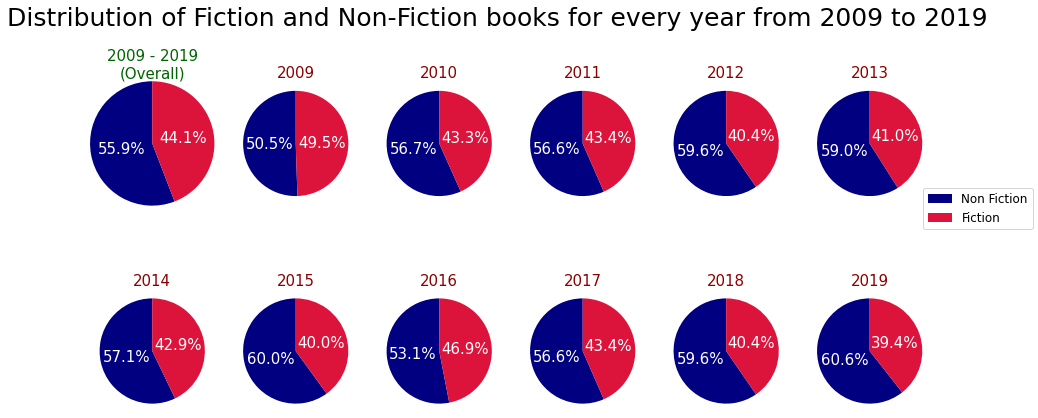

In [38]:
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)
g_count =best_sellers['genre'].value_counts()

fig, ax = plt.subplots(2, 6, figsize=(15,7))

ax[0,0].pie(x=g_count.values, labels=None, autopct='%1.1f%%',
            startangle=90, textprops={'size': 15, 'color': 'white'},
            pctdistance=0.5, radius=1.3, colors=genre_col)
ax[0,0].set_title('2009 - 2019\n(Overall)', color='darkgreen', fontdict={'fontsize': 15})

for i, year in enumerate(y1):
    counts = best_sellers[best_sellers['year'] == year]['genre'].value_counts()
    ax[0,i+1].set_title(year, color='darkred', fontdict={'fontsize': 15})
    ax[0,i+1].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                  startangle=90, textprops={'size': 15,'color': 'white'}, 
                  pctdistance=0.5, colors=genre_col, radius=1.1)

for i, year in enumerate(y2):
    counts = best_sellers[best_sellers['year'] == year]['genre'].value_counts()
    ax[1,i].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                startangle=90, textprops={'size': 15,'color': 'white'},
                pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[1,i].set_title(year, color='darkred', fontdict={'fontsize': 15})

plt.suptitle('Distribution of Fiction and Non-Fiction books for every year from 2009 to 2019',
             fontsize=25)
fig.legend(g_count.index, loc='center right', fontsize=12)
fig.show()

It is observed that 2019 had the highest number of best selling books which were Non Fiction while 2009 had more Fiction books which were best sellers.

### Distribution of the Unique Book Cover Types

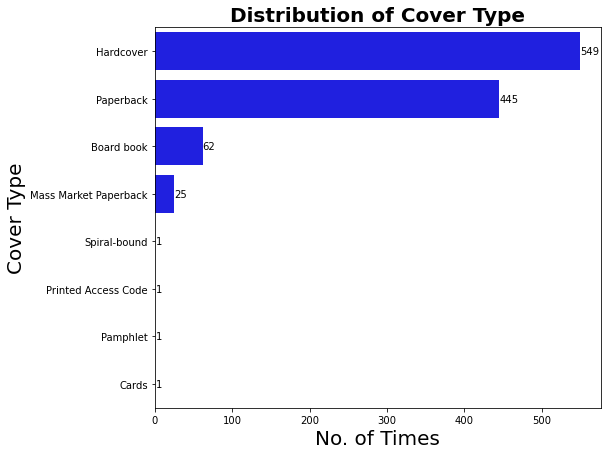

In [39]:
plt.figure(figsize=[8, 7])
ax = sns.barplot(
    data = best_sellers.cover_type.value_counts().head(10).reset_index(),
    y = 'index',
    x = 'cover_type',
    color='b'
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('No. of Times', fontsize=20)
plt.ylabel('Cover Type', fontsize=20)

plt.title("Distribution of Cover Type", weight='bold', fontsize = 20)
plt.show()

It is observed that in the total number of best selling books, majority of the books (459) had a hardcover type, followed by the books which had paperbacks (445).

### Top 10 Authors

**Based on Number of Times Their Books Appeared in Best Selling Listings**

In [40]:
# Top 10 authors based on number of times their books appeared in top list
best_sellers.author.value_counts().head(10)

Rick Riordan                          18
Suzanne Collins                       16
Jeff Kinney                           15
John Grisham                          13
Gallup                                13
Malcolm Gladwell                      12
Gary Chapman                          11
The College Board                     11
American Psychological Association    11
Stephen R. Covey                      10
Name: author, dtype: int64

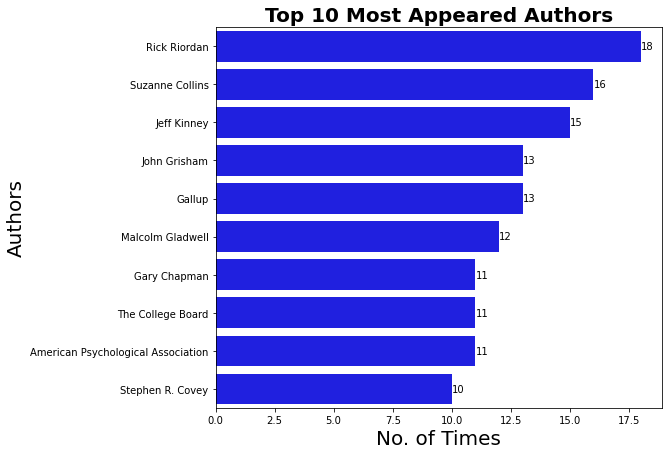

In [41]:
plt.figure(figsize=[8, 7])
ax = sns.barplot(
    data = best_sellers.author.value_counts().head(10).reset_index(),
    y = 'index',
    x = 'author',
    color='b'
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('No. of Times', fontsize=20)
plt.ylabel('Authors', fontsize=20)

plt.title("Top 10 Most Appeared Authors", weight='bold', fontsize = 20)
plt.show()

Generally, regardless of Genre or category, Rick Riordan,   Suzanne Collins and Jeff Kinney were top best selling authors from the top 10 most occuring authors.

### Top 10 Books

**Based on Number of Times Their Books Appeared in Best Selling Listings.**

In [42]:
# Top 10 authors based on number of times their books appeared in top list
best_sellers.title.value_counts().head(10)

Publication Manual of the American Psychological Association, 6th Edition            11
StrengthsFinder 2.0                                                                  11
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change         10
The Great Gatsby: The Only Authorized Edition                                         9
The Official SAT Study Guide                                                          9
What to Expect When You're Expecting                                                  8
The Five Dysfunctions of a Team: A Leadership Fable, 20th Anniversary Edition         8
How to Win Friends & Influence People                                                 8
Jesus Calling, Padded Hardcover, with Scripture references                            8
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)     8
Name: title, dtype: int64

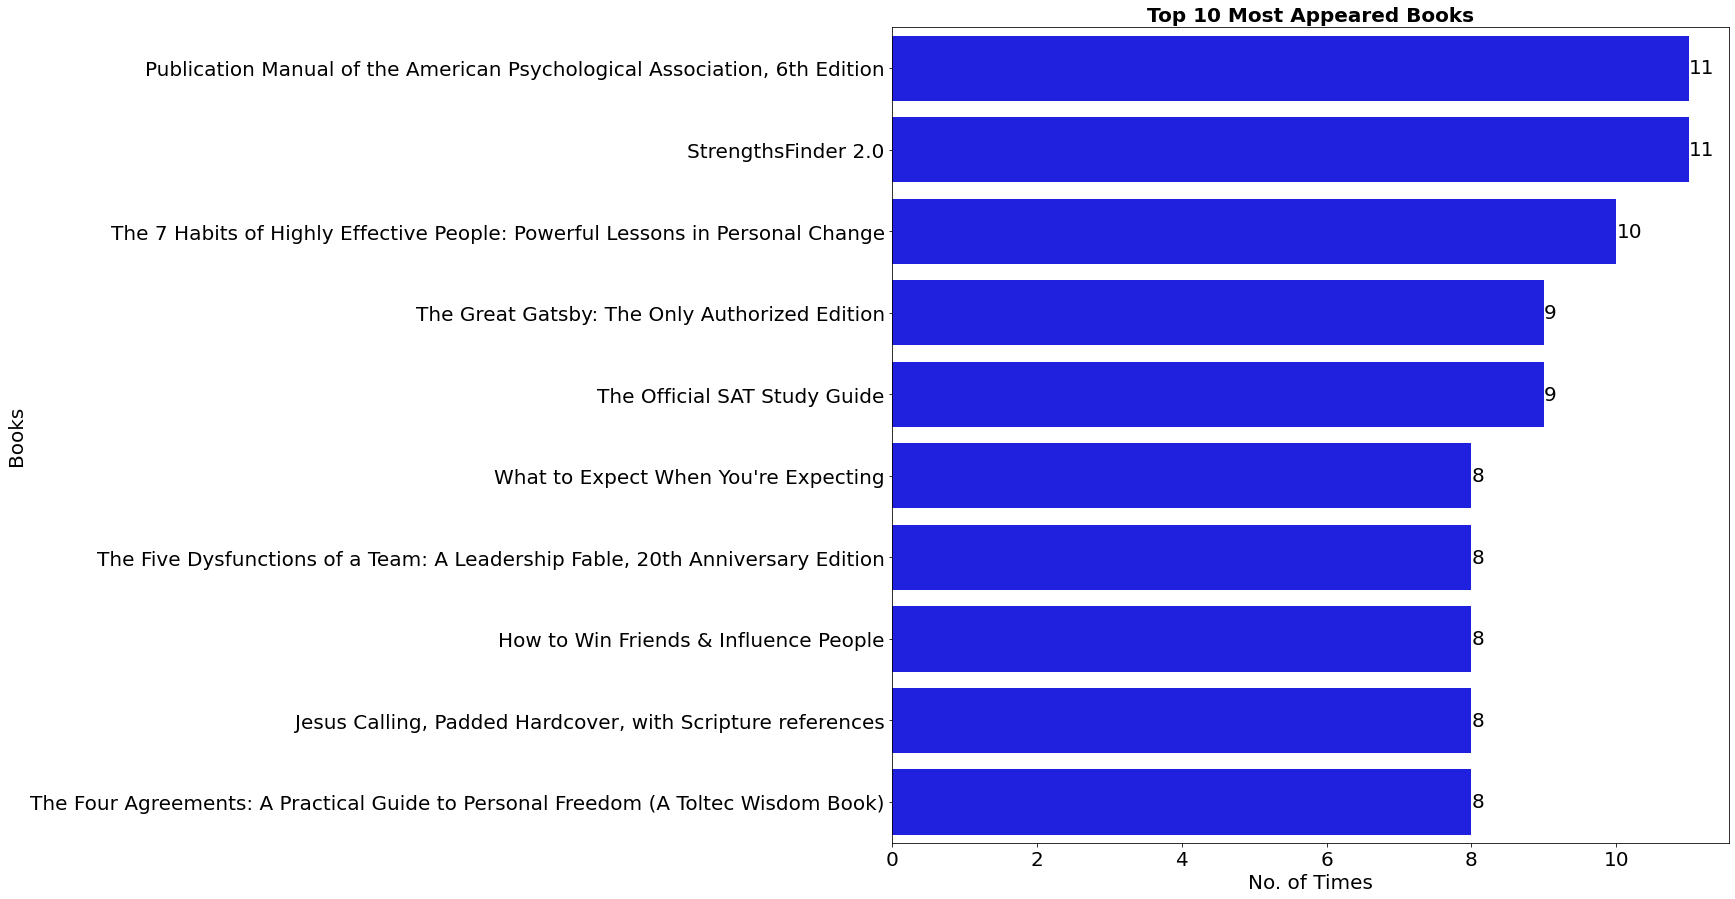

In [43]:
plt.rcParams['figure.figsize'] = (15, 15)

#set label sizes for axes, xtick and ytick
plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

ax = sns.barplot(
    data = best_sellers.title.value_counts().head(10).reset_index(),
    y = 'index',
    x = 'title',
    color='b'
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('No. of Times', fontsize=20)
plt.ylabel('Books', fontsize=20)

plt.title("Top 10 Most Appeared Books", weight='bold', fontsize=20)
plt.show()

Generally, regardless of Genre, Publication Manual of the American Psychology Assscoiation, 6th Edition,  StrengthsFinder 2.0, 7 Habits of Highly Effective People were the top best selling books from the to 10 most occuring books.

### Distribution of User Rating, Reviews and Price

In [44]:
best_sellers['ratings'].describe()

count    1085.000000
mean        4.635392
std         0.201839
min         3.400000
25%         4.500000
50%         4.700000
75%         4.800000
max         4.900000
Name: ratings, dtype: float64

In [45]:
best_sellers['price'].describe()

count    1085.000000
mean       14.287244
std        10.643434
min         1.170000
25%         8.970000
50%        12.700000
75%        16.650000
max       144.000000
Name: price, dtype: float64

In [46]:
best_sellers['no_of_reviews'].describe()

count      1085.000000
mean      21275.978802
std       27156.455048
min          50.000000
25%        5803.000000
50%       13061.000000
75%       28447.000000
max      344811.000000
Name: no_of_reviews, dtype: float64

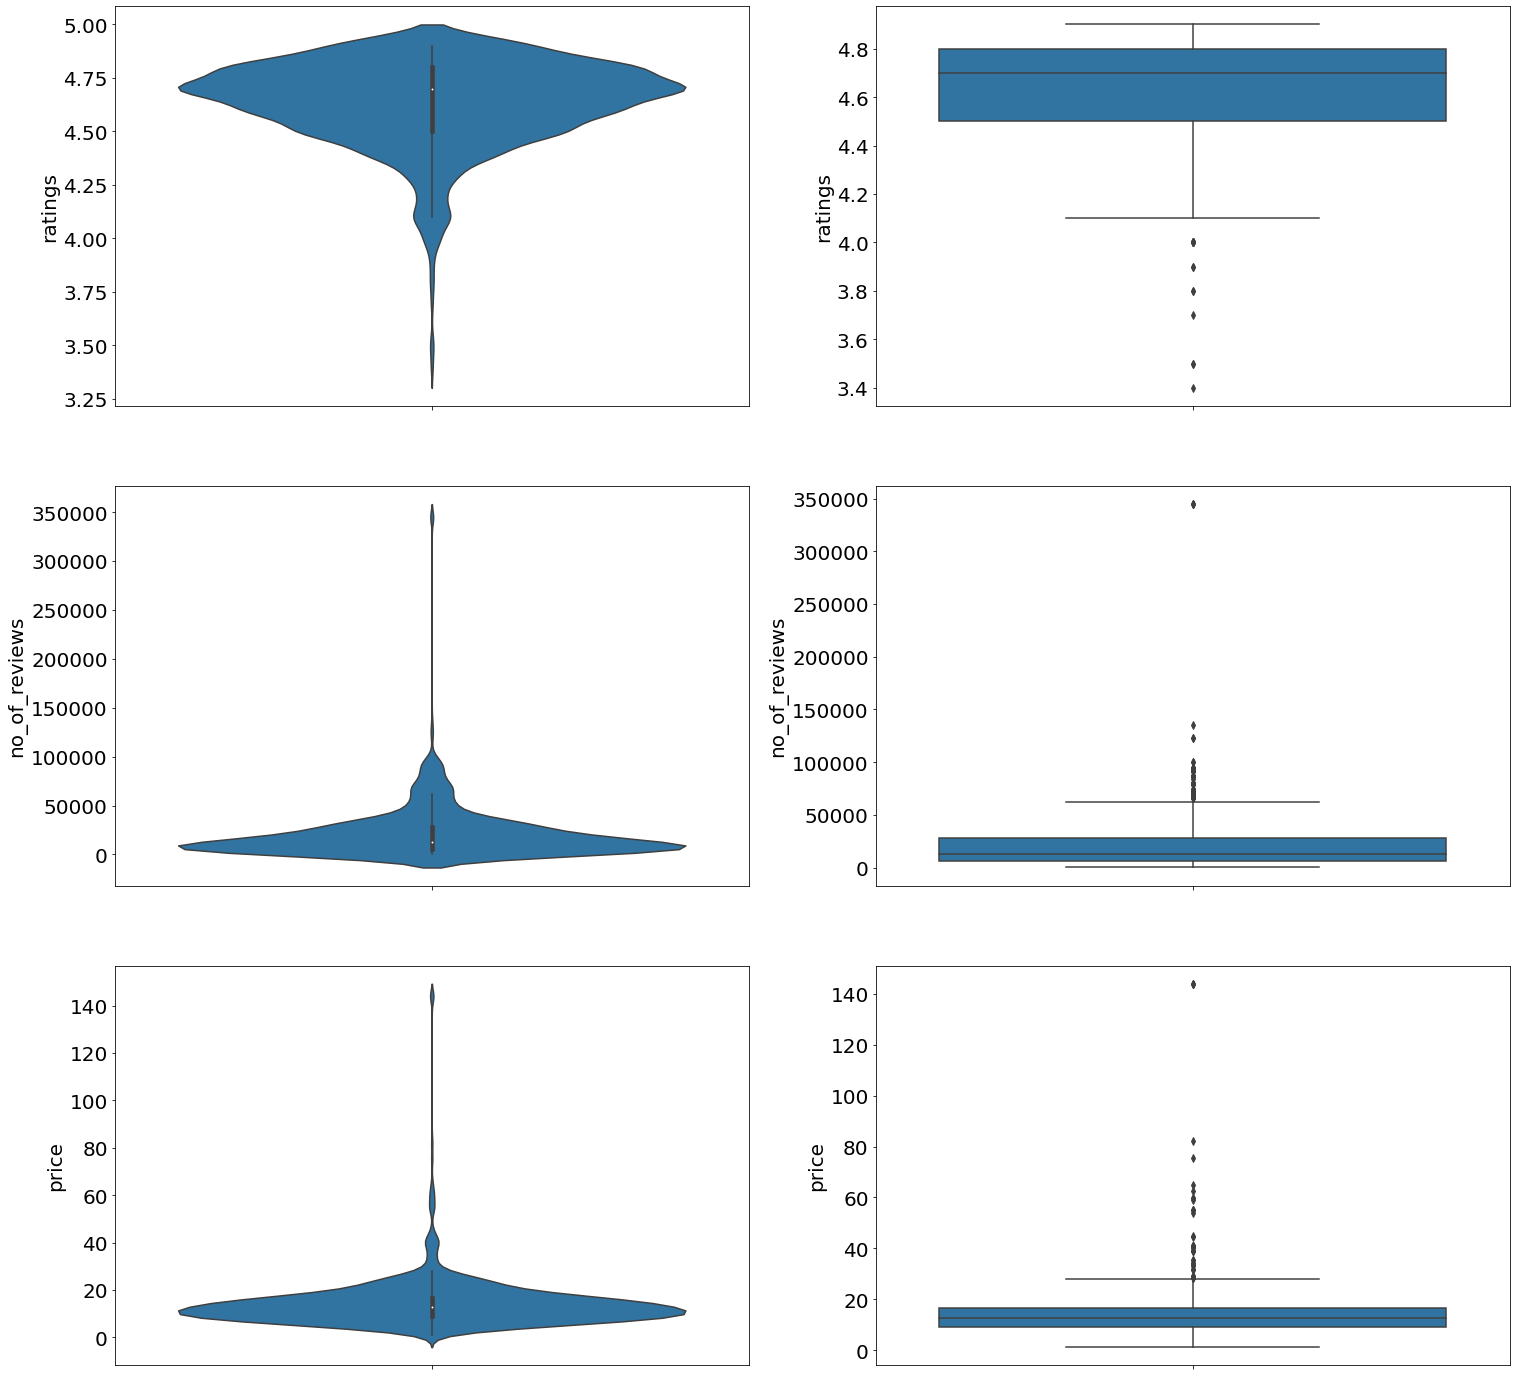

In [47]:
# violin plots and boxplots of Rating, Reviews and Price
plt.figure(figsize=(25, 25))

plt.subplot(3,2,1)
sns.violinplot(data=best_sellers, y='ratings')

plt.subplot(3,2,2)
sns.boxplot(data=best_sellers, y='ratings')

plt.subplot(3,2,3)
sns.violinplot(data=best_sellers, y='no_of_reviews')

plt.subplot(3,2,4)
sns.boxplot(data=best_sellers, y='no_of_reviews')

plt.subplot(3,2,5)
sns.violinplot(data=best_sellers, y='price')

plt.subplot(3,2,6)
sns.boxplot(data=best_sellers, y='price');

We observe that most user rating occured between 4.5 and 4.8, most occuring price range was between 9 and 17 dollars, nd most occuring number of reviews were below 30,000.

Meanwhile we notice otliers in the each of these variables:

 - The top outlier in the price range is a book that was sold around 140 dollars. 
 
 - The top outliers in the ratings variable were books that had below 3.6 ratings.
 
 -  The top outliers in the reviews variable is a book that had about 340,000 reviews.

## Bivariate Analysis

### Relationship between Reviews and Price

In [48]:
best_sellers.corr()

,price,ranks,no_of_reviews,ratings,year
price,1.000000,0.000405,-0.119121,-0.089877,-0.196831
ranks,0.000405,1.000000,-0.125835,-0.021849,0.001408
no_of_reviews,-0.119121,-0.125835,1.000000,0.197863,0.363580
ratings,-0.089877,-0.021849,0.197863,1.000000,0.243538
year,-0.196831,0.001408,0.363580,0.243538,1.000000


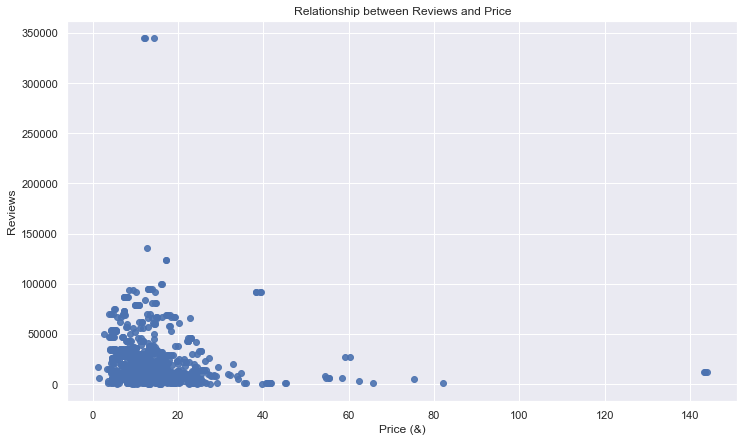

In [49]:
# let's visualize the correlation between reviews and price
sns.set(rc={'figure.figsize':(12,7)})
sns.regplot(data=best_sellers, x='price', y='no_of_reviews', x_jitter=0.7, fit_reg=False, scatter_kws={'alpha':0.9})
plt.title('Relationship between Reviews and Price')
plt.ylabel('Reviews')
plt.xlabel('Price (&)');

We could observe that Reviews has no relationship with Price but we also notice outliers in the book price and reviews. These outliers are books with prices above $140 dollars and reviews above 340,000.

### Genre Performance as Per Reviews

In [50]:
# top 20 authors by mean user rating
genre_and_reviews = pd.DataFrame(best_sellers.groupby('genre')['no_of_reviews'].mean().sort_values(ascending=False).iloc[:20].reset_index())
genre_and_reviews

,genre,no_of_reviews
0,Fiction,27599.960334
1,Non Fiction,16277.320132


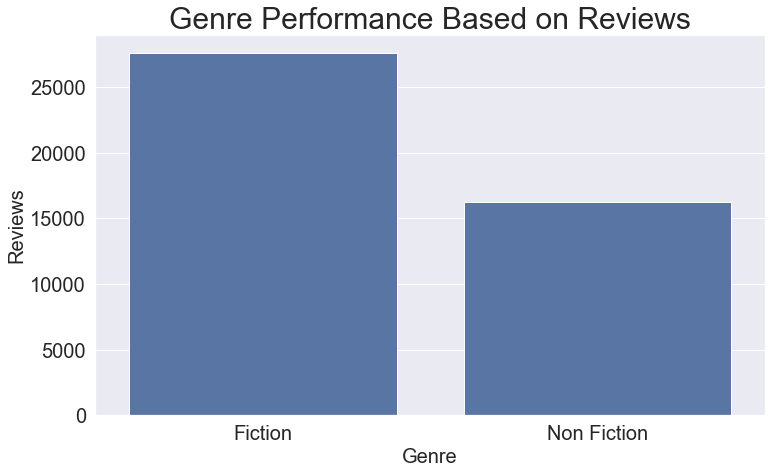

In [51]:
#set label sizes for axes, xtick and ytick
plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

sns.barplot(data=genre_and_reviews, x='genre', y='no_of_reviews', color='b')
plt.ylabel('Reviews', fontsize=20)
plt.xlabel('Genre', fontsize=20)
plt.title('Genre Performance Based on Reviews', fontsize = 30)
plt.show()

We could observe from the bar graph that between 2009 and 2019, the Fiction best belling books had more reviews than Non Fiction books.

### Relationship between the Price of Books and Years

In [52]:
avg_price_and_year = best_sellers.groupby('year').price.mean().sort_values(ascending=False)
avg_price_and_year

year
2013    16.737600
2009    16.698454
2012    16.691919
2011    16.588081
2010    15.888866
2014    15.585102
2015    12.711000
2018    12.278283
2017    11.592020
2016    11.569796
2019    10.876465
Name: price, dtype: float64

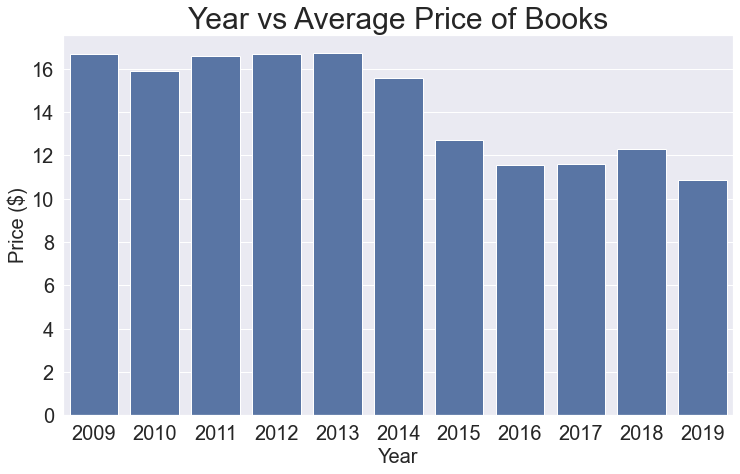

In [53]:
sns.barplot(x = avg_price_and_year.index, y= avg_price_and_year, color='b')
plt.ylabel('Price ($)', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title('Year vs Average Price of Books', fontsize = 30);

We observe that 2013, 2009, 2012 and 2011 were years with the highest average price of books. The average cost of books started decreasing from 2014, increased in 2018, and then decreased again till 2019.

### Top 20 Authors with the highest User Ratings

In [54]:
# top 20 authors by mean user rating
author_and_rating = pd.DataFrame(best_sellers.groupby('author')['ratings'].mean().sort_values(ascending=False).iloc[:20].reset_index())
author_and_rating

,author,ratings
0,Dungeons & Dragons,4.9
1,J. Kenji Lopez-Alt,4.9
2,J. K. Rowling,4.9
3,Priscilla Shirer,4.9
4,Andrea Beaty,4.9
5,Mr. Jim Kay,4.9
6,Bill Martin Jr.,4.9
7,Sherri Duskey Rinker,4.9
8,Maurice Sendak,4.9
9,Sarah Young,4.9


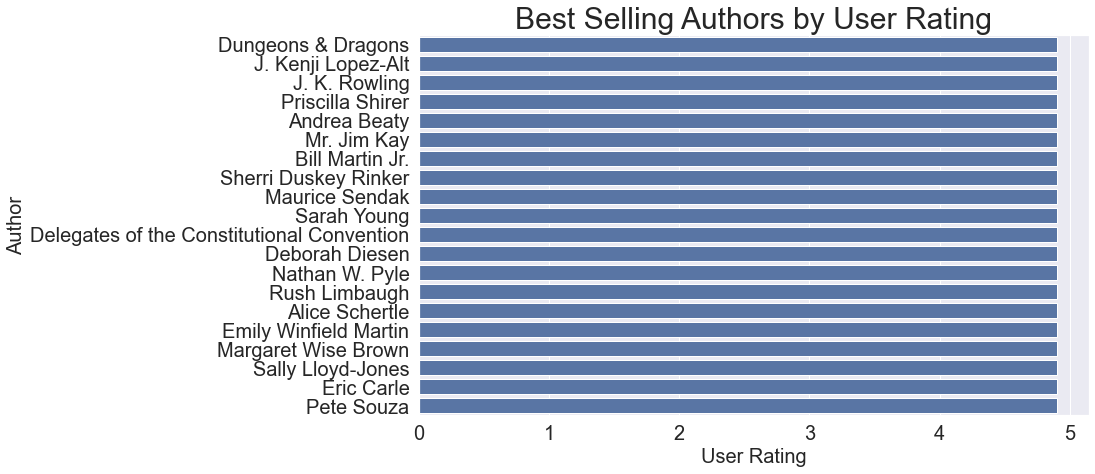

In [55]:
# visualizing the top 20 authors based on user rating

#set label sizes for axes, xtick and ytick
plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

sns.barplot(data=author_and_rating, x='ratings', y='author', color='b')
plt.ylabel('Author', fontsize=20)
plt.xlabel('User Rating', fontsize=20)
plt.title('Best Selling Authors by User Rating', fontsize = 30)
plt.show()

The top 20 authors with higher user ratings had more than 4.5 stars in User Ratings.

### Top 20 Authors with the Highest Reviews

In [56]:
# top 20 authors by mean reviews
author_and_reviews = pd.DataFrame(best_sellers.groupby('author')['no_of_reviews'].mean().sort_values(ascending=False).iloc[:20].reset_index())
author_and_reviews

,author,no_of_reviews
0,Delia Owens,344811.0
1,Alex Michaelides,135163.0
2,Michelle Obama,123276.0
3,Robert T. Kiyosaki,94095.0
4,Paula Hawkins,91515.0
5,Don Miguel Ruiz,86676.0
6,James Clear,84079.0
7,Kristin Hannah,81518.0
8,Mark Manson,80328.0
9,Dale Carnegie,79094.0


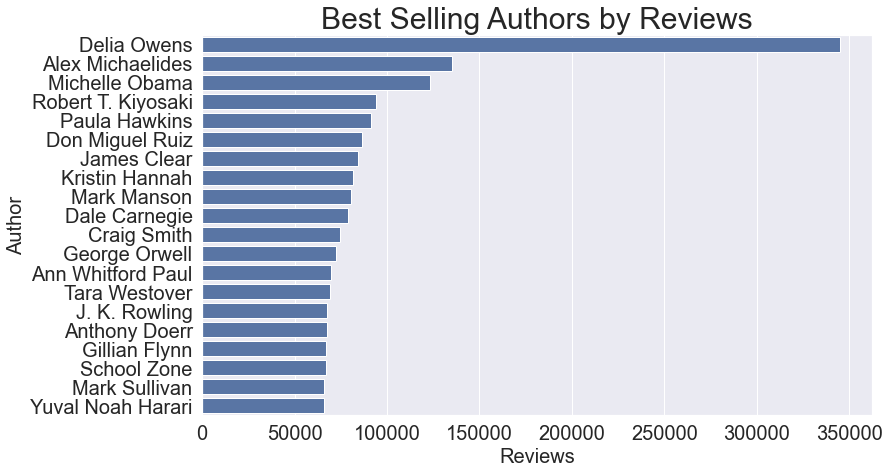

In [57]:
# visualizing the top 20 authors based on reviews

#set label sizes for axes, xtick and ytick
plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

sns.barplot(data=author_and_reviews, x='no_of_reviews', y='author', color='b')
plt.ylabel('Author', fontsize=20)
plt.xlabel('Reviews', fontsize=20)
plt.title('Best Selling Authors by Reviews', fontsize = 30)
plt.show()

Generally, we can see that Delia Owens, Alex Michaelides, Michelle Obama, Robert Kiyosaki and  Paula Hawkins were the top 5 in the top 20 best selling autors with higher number of reviews. But we notice that Delia Owens is that outlier that had the maximum number of reviews which is about 340,000 reviews and is very much higher than other authors reviews.

### Top 20 Authors Based on Book Price

In [58]:
# top 20 authors by mean price
author_and_price = pd.DataFrame(best_sellers.groupby('author')['price'].mean().sort_values(ascending=False).iloc[:20].reset_index())
author_and_price

,author,price
0,American Psychiatric Association,144.000000
1,Hall H Pearson Education,75.490000
2,George R.R. Martin,54.980000
3,Jay-Z,44.990000
4,Larry Schweikart,44.500000
5,Stephanie Milton,41.840000
6,GMAC (Graduate Management Admission Council),39.990000
7,Kelly Starrett,35.470000
8,Jorge Cruise,35.300000
9,Alan Moore,33.990000


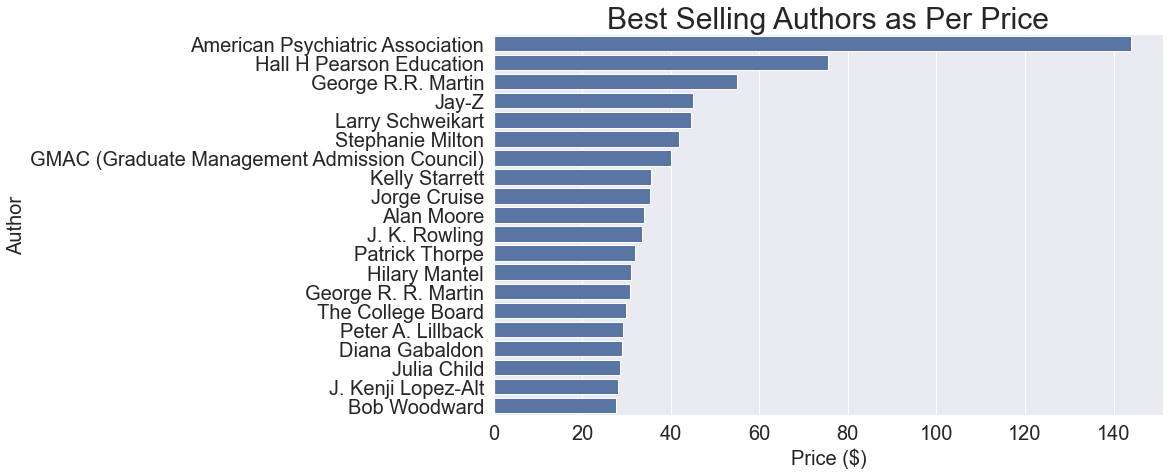

In [59]:
# visualizing the top 20 authors based on price

#set label sizes for axes, xtick and ytick
plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

sns.barplot(data=author_and_price, x='price', y='author', color='b')
plt.ylabel('Author', fontsize=20)
plt.xlabel('Price ($)', fontsize=20)
plt.title('Best Selling Authors as Per Price', fontsize = 30)
plt.show()

We could observe that the top 5 authors with highest priced books are American Psychiatric Association, Hall H Pearson Education, George R.R Martin, and Jay-Z. 

American Psychiatric Association is an outlier having the maximum average price of 144 dollars.

 ### Does the length of book title affect User Rating?

In [60]:
book_title_length = [len(name) for name in best_sellers['title']]
best_sellers['Title Length'] = book_title_length

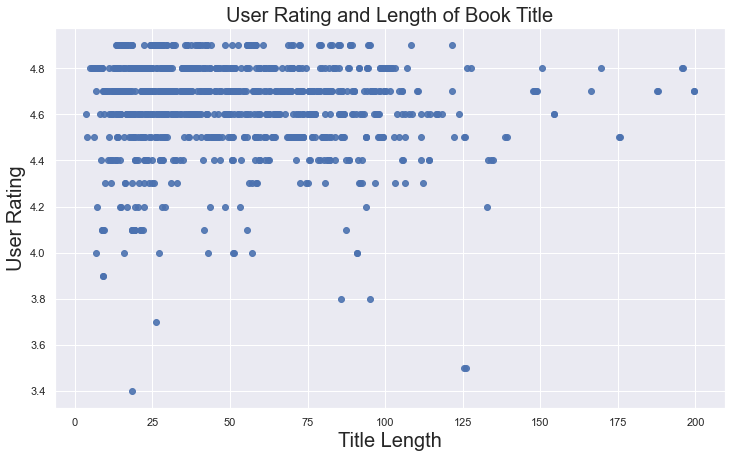

In [61]:
# let's visualize the correlation between user rating and length of book title 2
sns.set(rc={'figure.figsize':(12,7)})
sns.regplot(data=best_sellers, x='Title Length', y='ratings', x_jitter=0.7, fit_reg=False, scatter_kws={'alpha':0.9})
plt.title('User Rating and Length of Book Title', fontsize=20)
plt.ylabel('User Rating', fontsize=20)
plt.xlabel('Title Length', fontsize=20);

We notice there is no correlation between user rating and length of books. But we could also see that books with shorter title have more user ratings.

## Multivariate Analysis

### Top 10 Best Selling Authors based on Genre and Number of Appearances

In [62]:
best_nf_authors = best_sellers.groupby(['author', 'genre']).agg({'title': 'count'}).unstack()['title', 'Non Fiction'].sort_values(ascending=False)[:10].reset_index()
best_nf_authors

,author,title
,,Non Fiction
0,Gallup,13.0
1,Malcolm Gladwell,12.0
2,American Psychological Association,11.0
3,The College Board,11.0
4,Gary Chapman,11.0
5,Stephen R. Covey,10.0
6,Heidi Murkoff,8.0
7,Don Miguel Ruiz,8.0
8,Bill O'Reilly,8.0


In [63]:
best_f_authors = best_sellers.groupby(['author', 'genre']).agg({'title': 'count'}).unstack()['title', 'Fiction'].sort_values(ascending=False)[:10].reset_index()
best_f_authors

,author,title
,,Fiction
0,Rick Riordan,18.0
1,Suzanne Collins,16.0
2,Jeff Kinney,15.0
3,John Grisham,13.0
4,Dr. Seuss,10.0
5,Stephenie Meyer,9.0
6,E L James,9.0
7,Paulo Coelho,9.0
8,John Green,9.0


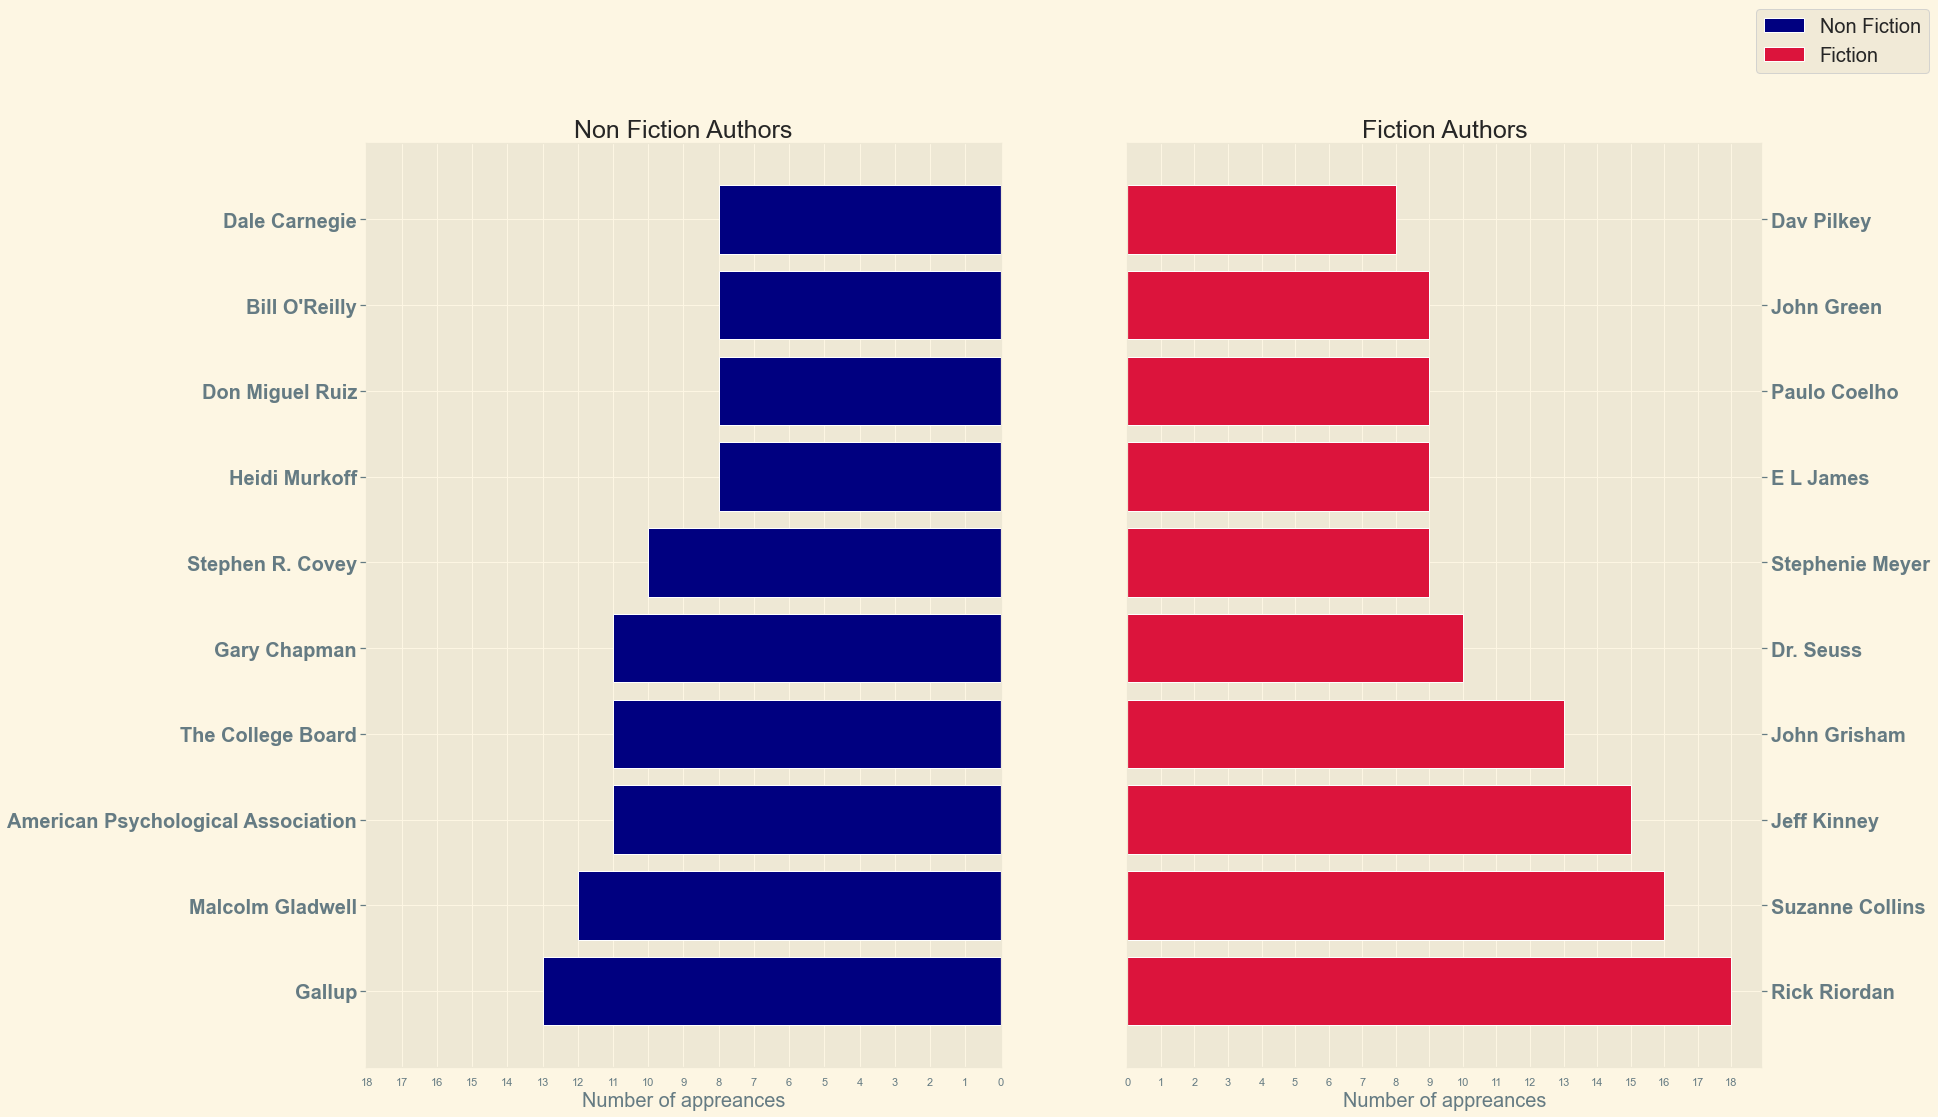

In [64]:
best_nf_authors = best_sellers.groupby(['author', 'genre']).agg({'title': 'count'}).unstack()['title', 'Non Fiction'].sort_values(ascending=False)[:10]
best_f_authors = best_sellers.groupby(['author', 'genre']).agg({'title': 'count'}).unstack()['title', 'Fiction'].sort_values(ascending=False)[:10]

with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(25, 17))
    
    ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values,
           color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[0].set_yticklabels(best_nf_authors.index, fontsize=20, fontweight='semibold')
    ax[0].set_title('Non Fiction Authors', fontsize=25)
    ax[0].set_xlabel('Number of appreances', fontsize=20)
    
    ax[1].barh(y=best_f_authors.index, width=best_f_authors.values,
           color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[1].set_yticklabels(best_f_authors.index, fontsize=20, fontweight='semibold')
    ax[1].set_title('Fiction Authors', fontsize=25)
    ax[1].set_xlabel('Number of appreances', fontsize=20)
    
    fig.legend(['Non Fiction', 'Fiction'], fontsize=20)
    
plt.show()

When it comes to the number of times their books was listed as a best selling book between 2009 and 2019, in the top ten filtered authors, 

 - the top five best selling authors in Fiction were Rick Riordan, Suzanne Collins, Jeff Kinney, Dr.Seuss, and Stephen Meyer.
 
 - the top five best selling authors in Non Fiction were  Gallup, Malcom Gladwell, American Psychological Association, The College Board, and Gary Chapman.

### Overall Best-Selling Authors Based on their Appearances (Fiction and Non Fiction Combined)

The number of appearances includes duplicate book names, their unique posts and overall reviews.

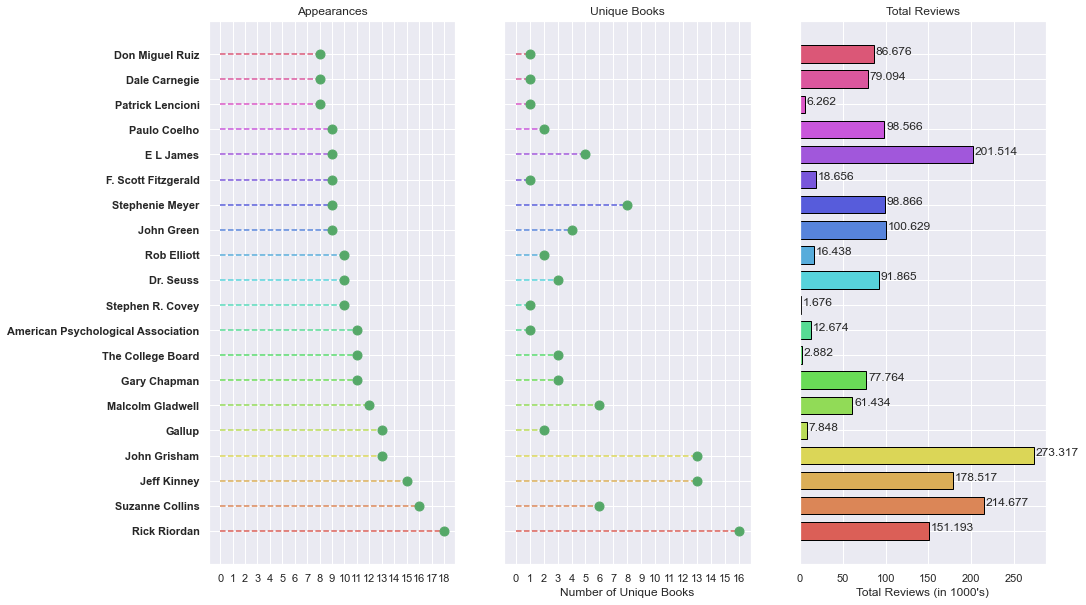

In [65]:
no_of_best = 20

top_authors = best_sellers.author.value_counts().nlargest(no_of_best)
no_duplicate = best_sellers.drop_duplicates('title') # removing all rows with duplicate book names

fig, ax = plt.subplots(1, 3, figsize=(15,10), sharey=True)

color = sns.color_palette('hls', no_of_best)

ax[0].hlines(y=top_authors.index, xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_label('Number of Appearances')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticklabels(top_authors.index, fontweight='semibold')
ax[0].set_title('Appearances')

book_count = []
total_reviews = []
for name, col in zip(top_authors.index, color):
    book_count.append(len(no_duplicate[no_duplicate.author == name]['title']))
    total_reviews.append(no_duplicate[no_duplicate.author == name]['no_of_reviews'].sum()/1000)
ax[1].hlines(y=top_authors.index, xmin=0, xmax=book_count, color=color, linestyles='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of Unique Books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique Books')

ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)
for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val+2, name, val)
ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total Reviews')

#plt.suptitle('Top 20 Best Selling Autors (from 2009 to 2019), fontsize=15')
plt.show()

Here Regardless of genre, we see that Fiction writers like Rick Riordan, Suzanne Collins, Jeff Kinney, and John Grisham were the best selling or sought after authors. 

### Top 10 Books Based on User Rating

In [66]:
# Group by name, author, based on user rating.
rating_wise = pd.DataFrame(best_sellers.groupby(['title', 'author'])['ratings'].mean())
rating_wise.reset_index(inplace=True)

# sort values in descending order based on rating
rating_wise = rating_wise.sort_values(by='ratings', ascending=False)
rating_wise.head(10)

,title,author,ratings
277,Little Blue Truck,Alice Schertle,4.9
320,Obama: An Intimate Portrait,Pete Souza,4.9
130,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9
129,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9
128,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9
127,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9
126,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9
125,Dog Man Unleashed: From the Creator of Captain...,Dav Pilkey,4.9
233,Humans of New York : Stories,Brandon Stanton,4.9
489,The Jesus Storybook Bible: Every Story Whisper...,Sally Lloyd-Jones,4.9


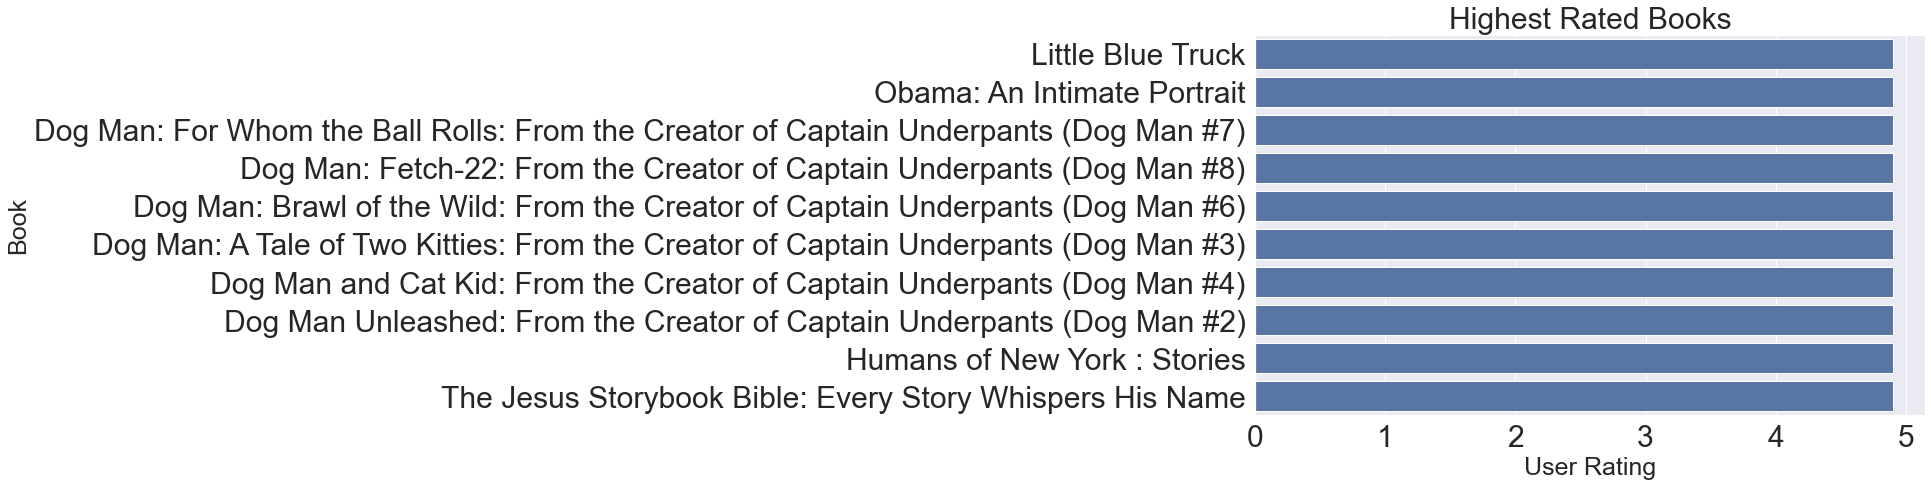

In [67]:
# visualizing the top 10 books based on user rating

#set label sizes for axes, xtick and ytick
plt.rc('font', size=30)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)

sns.barplot(data=rating_wise.head(10), x='ratings', y='title', color='b')
plt.ylabel('Book', fontsize=25)
plt.xlabel('User Rating', fontsize=25)
plt.title('Highest Rated Books', fontsize = 30)
plt.show()

The top ten books based on user rating had more than 4.5 stars in their user ratings.

### Top 10 Books Based on Reviews

In [68]:
# Group by name, author, based on user rating.
review_wise = pd.DataFrame(best_sellers.groupby(['title', 'author'])['no_of_reviews'].mean())
review_wise.reset_index(inplace=True)

# sort values in descending order based on rating
review_wise = review_wise.sort_values(by='no_of_reviews', ascending=False)
review_wise.head(10)

,title,author,no_of_reviews
626,Where the Crawdads Sing,Delia Owens,344811.00
552,The Silent Patient,Alex Michaelides,135163.00
48,Becoming,Michelle Obama,123276.00
512,The Nightingale: A Novel,Kristin Hannah,99932.00
412,"The Alchemist, 25th Anniversary: A Fable About...",Paulo Coelho,94750.00
358,Rich Dad Poor Dad: What the Rich Teach Their K...,Robert T. Kiyosaki,94095.00
216,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,91628.75
459,The Girl on the Train,Paula Hawkins,91515.00
451,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,86676.00
41,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,84079.00


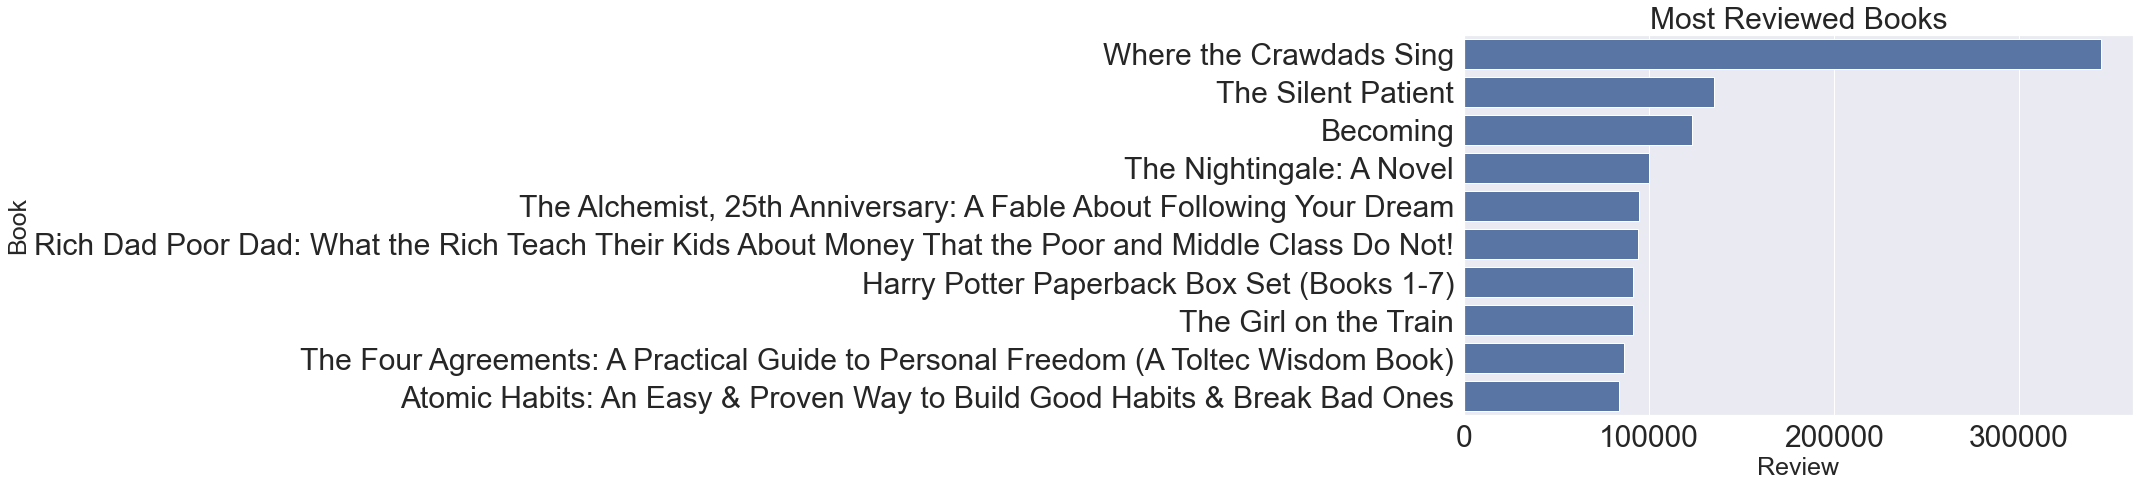

In [69]:
# visualizing the top 10 books based on user rating
#plt.figure(figsize=[8, 7])
#set label sizes for axes, xtick and ytick
plt.rc('font', size=30)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)

sns.barplot(data=review_wise.head(10), x='no_of_reviews', y='title', color='b')
plt.ylabel('Book', fontsize=25)
plt.xlabel('Review', fontsize=25)
plt.title('Most Reviewed Books', fontsize = 30)
plt.show()

We could observe that the top best selling books based on user ratings had When the Crawdads Sing, The Silent Patient, Becoming, and The Nightingale: A Novel as the top 4 books.

Meanwhile we observe that When The Crawdads Sing is that top outlier with the highest average number of reviews of about 344811 reviews.

### Best Selling Books by Genre and Number of Reviews

In [70]:
# Based on reviews, group by name, author, and genre
genre_reviews = pd.DataFrame(best_sellers.groupby(['title', 'author', 'genre']).no_of_reviews.mean()).reset_index()
genre_reviews = genre_reviews.sort_values(by='no_of_reviews', ascending=False)
genre_reviews.head(11)

,title,author,genre,no_of_reviews
634,Where the Crawdads Sing,Delia Owens,Fiction,344811.00
560,The Silent Patient,Alex Michaelides,Fiction,135163.00
48,Becoming,Michelle Obama,Non Fiction,123276.00
520,The Nightingale: A Novel,Kristin Hannah,Fiction,99932.00
417,"The Alchemist, 25th Anniversary: A Fable About...",Paulo Coelho,Fiction,94750.00
363,Rich Dad Poor Dad: What the Rich Teach Their K...,Robert T. Kiyosaki,Non Fiction,94095.00
219,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,Fiction,91628.75
466,The Girl on the Train,Paula Hawkins,Fiction,91515.00
457,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,Non Fiction,86676.00
41,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,Non Fiction,84079.00


In [71]:
# Extract data for fiction and non fiction genres
genre_reviews_fiction = genre_reviews.loc[genre_reviews.genre=='Fiction']
genre_reviews_non_fiction = genre_reviews.loc[genre_reviews.genre=='Non Fiction']

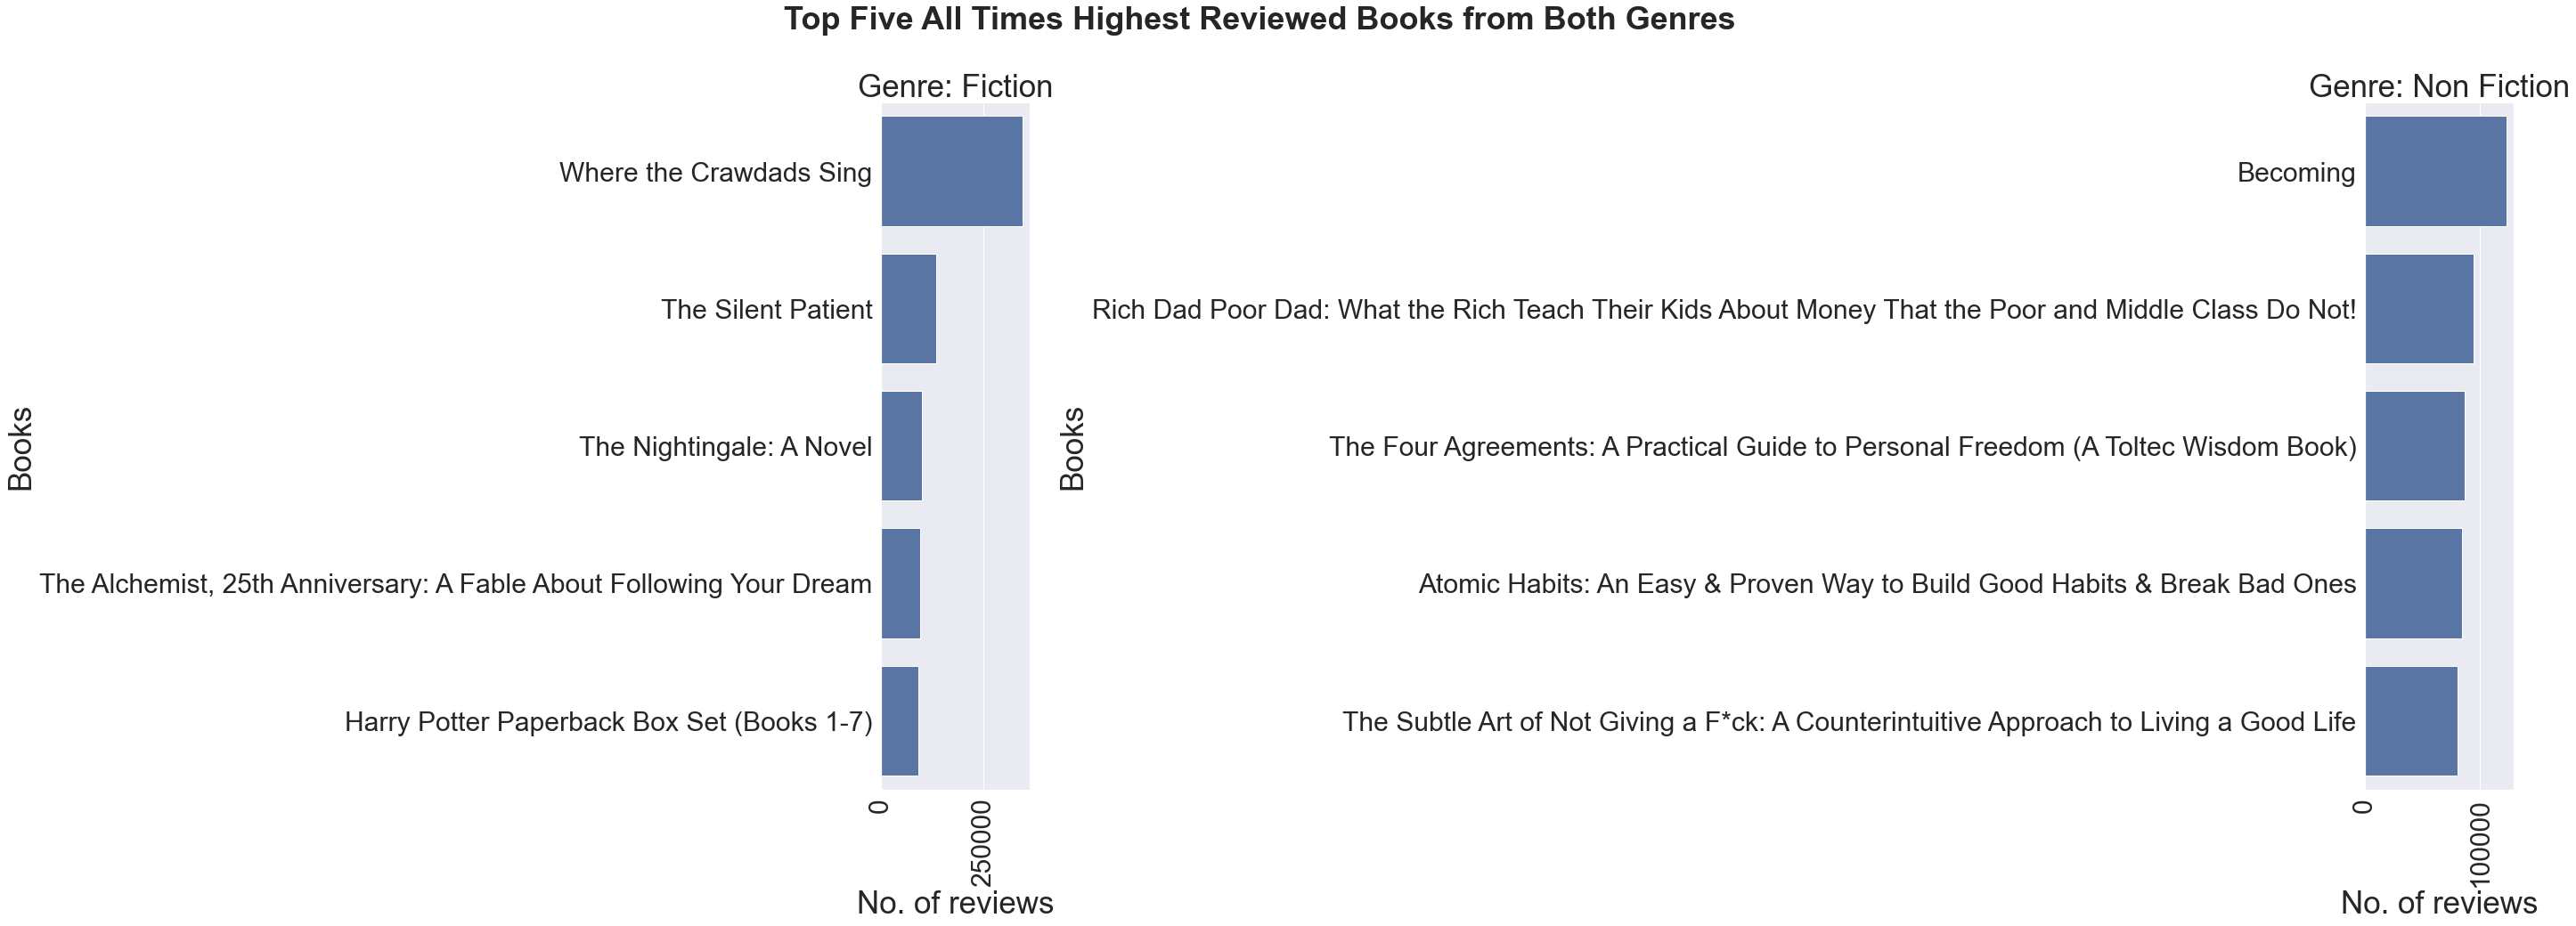

In [72]:
fig, ax = plt.subplots(figsize=(40, 15))

#set label sizes for axes, xtick and ytick
plt.rc('font', size=30)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)

fig.suptitle('Top Five All Times Highest Reviewed Books from Both Genres', weight='bold')

plt.subplot(1,2,1)
fiction = sns.barplot(data=genre_reviews_fiction.head(), x='no_of_reviews', y='title', color='b')
plt.xticks(rotation=90)
plt.title("Genre: Fiction", fontsize=35)
plt.xlabel('No. of reviews', fontsize=35)
plt.ylabel("Books", fontsize=35)

plt.subplot(1,2,2)
fiction = sns.barplot(data=genre_reviews_non_fiction.head(), x='no_of_reviews', y='title', color='b')
plt.xticks(rotation=90)
plt.title("Genre: Non Fiction", fontsize=35)
plt.xlabel("No. of reviews", fontsize = 35)
plt.ylabel("Books", fontsize=35)


plt.tight_layout()
plt.show();

In [73]:
#Plotting them seperately

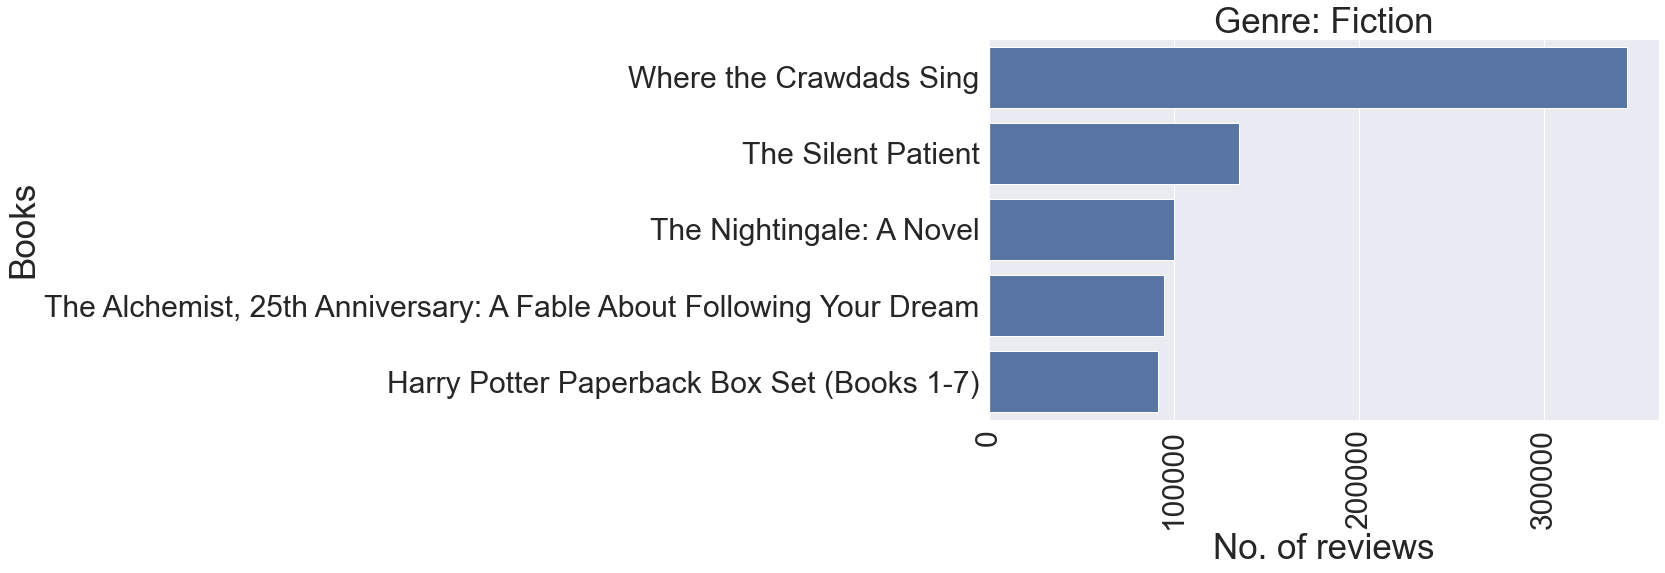

In [74]:
#set label sizes for axes, xtick and ytick
plt.rc('font', size=30)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)


fiction = sns.barplot(data=genre_reviews_fiction.head(), x='no_of_reviews', y='title', color='b')
plt.xticks(rotation=90)
plt.title("Genre: Fiction", fontsize=35)
plt.xlabel('No. of reviews', fontsize=35)
plt.ylabel("Books", fontsize=35)

plt.tight_layout()
plt.show();

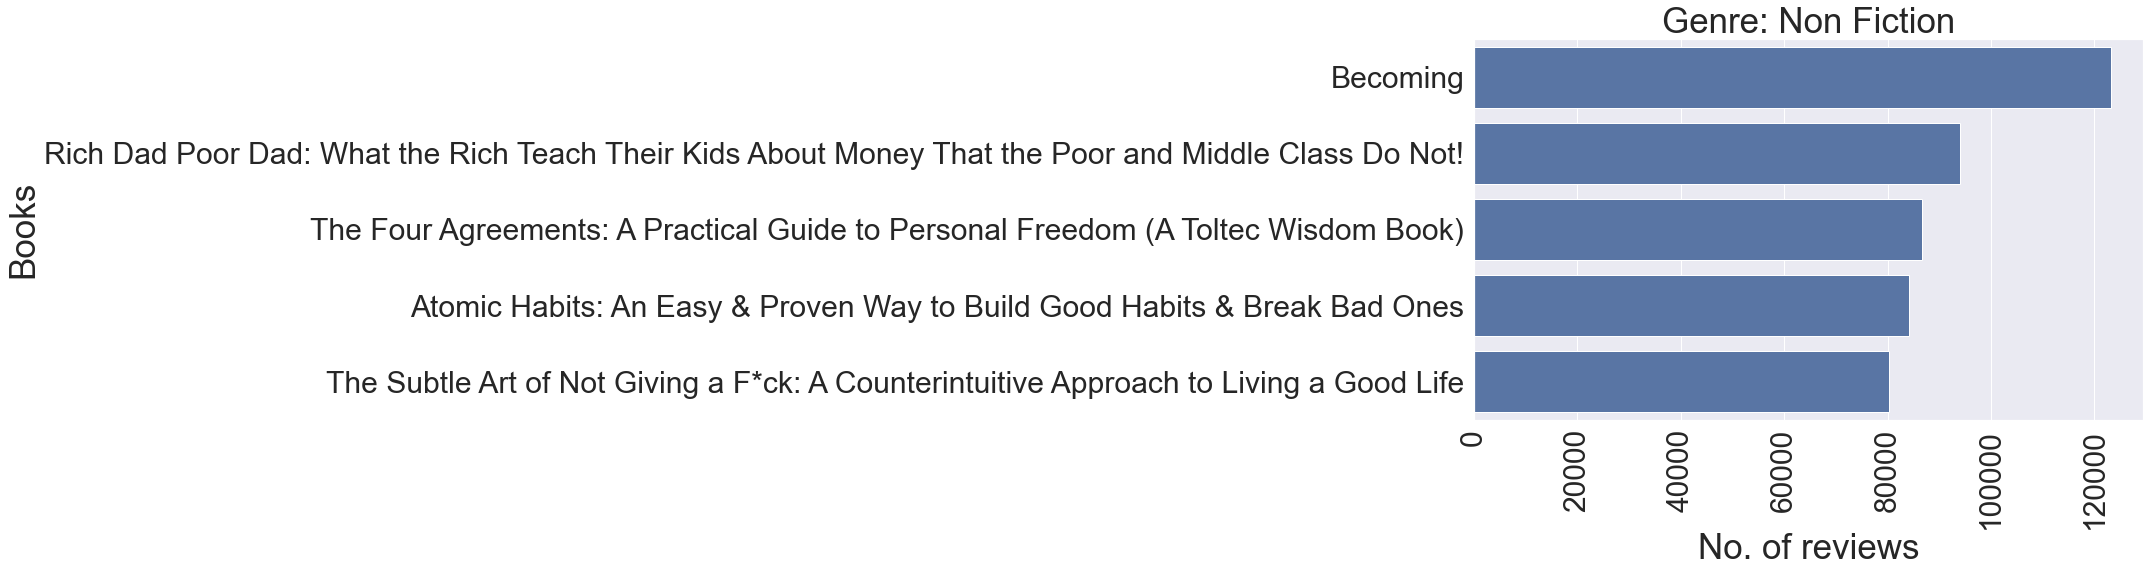

In [75]:
#set label sizes for axes, xtick and ytick
plt.rc('font', size=30)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)

fiction = sns.barplot(data=genre_reviews_non_fiction.head(), x='no_of_reviews', y='title', color='b')
plt.xticks(rotation=90)
plt.title("Genre: Non Fiction", fontsize=35)
plt.xlabel("No. of reviews", fontsize = 35)
plt.ylabel("Books", fontsize=35)

plt.tight_layout()
plt.show();

The top five Fiction Books with the highest number of reviews were Where the Crawdads Sing, The Silent Patient, The Nightingale: A Novel, The Alchemist, 25th Anniversary: A Fable About Following Your Dreams.

While in the Non Fiction books, the Top five were Becoming, Rich Dad Poor Dad: What the Rich Teach Their Kids About Money That the Poor and Middle Class Do Not!, The Four Agreements: A pratical Guide to Personal Freedom (ATolfec Wisdom Book), Atomic Hbaits, An Easy & Proven Way to Build Habits & Break Bad Ones, and The Subtle Art of Not Giving a Fuuck: A Counterintutive Approach to Living A Good Life.

### Generally, Best Selling Books

These are still books that made more appeareances in the best selling listings between 2009 and 2019.

In [76]:
# create a new dataframe with name, year, and genre only
df = best_sellers[['title', 'year', 'genre']]

# create a new column stating each book individually counts 1 instance
df['Times'] = 1

# group the books based on the number of times they appeared in dataset
books = df.groupby('title').Times.count().reset_index()

# now sort the data based on number of times they appeared in dataset
books = books.sort_values(by='Times', ascending=False)

# fetch 10 books
books.head(10)

,title,Times
391,StrengthsFinder 2.0,11
346,Publication Manual of the American Psychologic...,11
407,The 7 Habits of Highly Effective People: Power...,10
466,The Great Gatsby: The Only Authorized Edition,9
510,The Official SAT Study Guide,9
445,The Five Dysfunctions of a Team: A Leadership ...,8
448,The Four Agreements: A Practical Guide to Pers...,8
615,What to Expect When You're Expecting,8
252,"Jesus Calling, Padded Hardcover, with Scriptur...",8
229,How to Win Friends & Influence People,8


In [77]:
# Top 10 authors based on number of times their books appeared in top list
#best_sellers.title.value_counts().head(10)

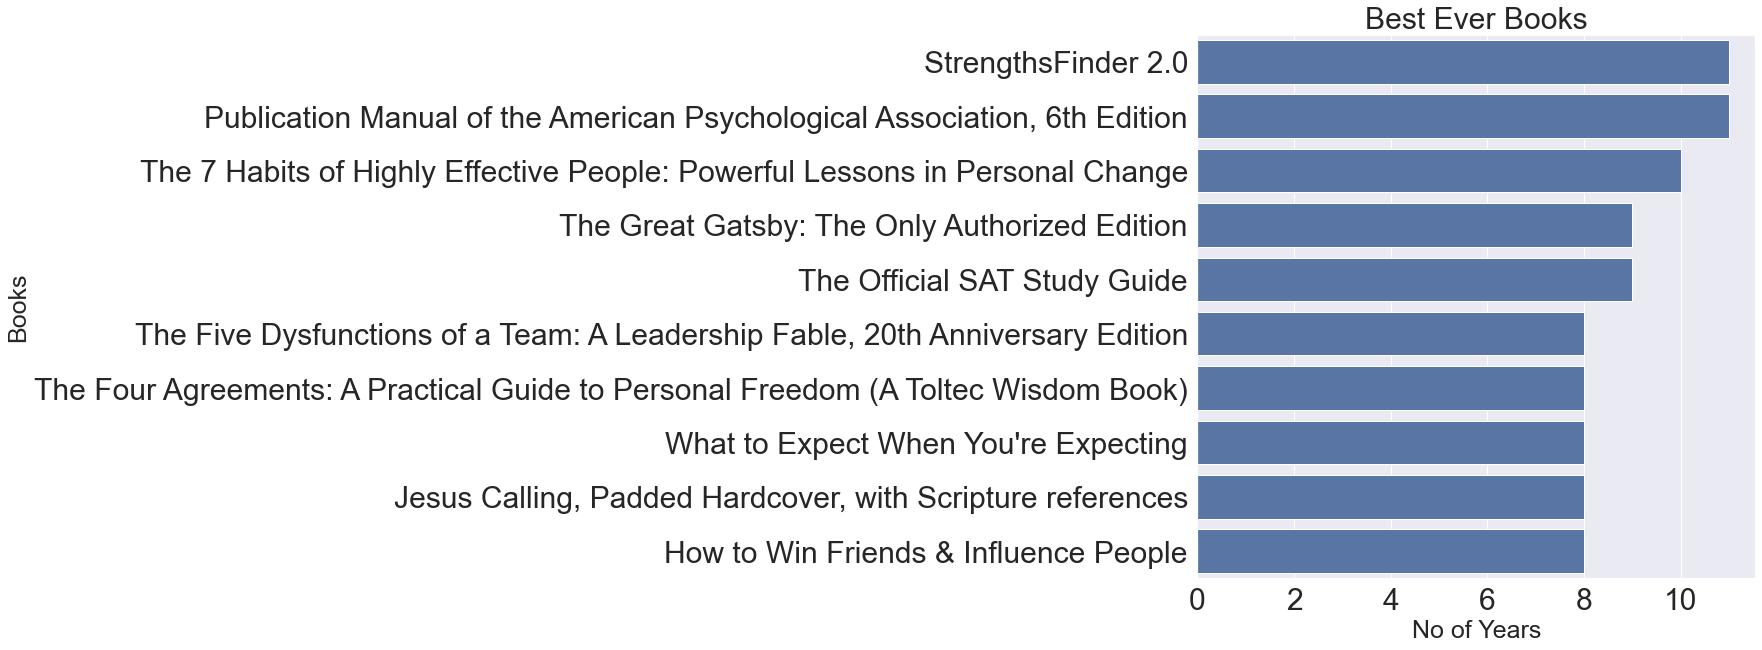

In [78]:
# set the fig size
plt.rcParams['figure.figsize'] = (10, 10)

sns.barplot(data=books.head(10), x='Times', y='title', color='b')
plt.xlabel('No of Years', fontsize=25)
plt.ylabel('Books', fontsize = 25)
plt.title('Best Ever Books', fontsize = 30)
plt.show()

We observe clearly that in the overall top best selling books based on appearance that self development books were most occuring books. These self development books include StrengthsFinder 2.0, The 7 Habits of Highly Effective People: Poerful Lessons in Personal Change, The Five Dysfunctions of a Team: A Leadership Fable, 20th Anniversary Edition, The Four Agreements: A Pratical Guide to Personal reedom (A Toltec Wisdom Book), and How to Win Friends and Influence People.

### A word Cloud of the Top Best Selling Books Between 2009 and 2019

In [79]:
# create a new dataframe with name, year, and genre only
df = best_sellers[['title', 'year', 'genre']]

# create a new column stating each book individually counts 1 instance
df['Times'] = 1

# group the books based on the number of times they appeared in dataset
books = pd.DataFrame(df.groupby('title').Times.count().reset_index())

# now sort the data based on number of times they appeared in dataset
books = books.sort_values(by='Times', ascending=False)

# fetch 10 books
books.head(10)

,title,Times
391,StrengthsFinder 2.0,11
346,Publication Manual of the American Psychologic...,11
407,The 7 Habits of Highly Effective People: Power...,10
466,The Great Gatsby: The Only Authorized Edition,9
510,The Official SAT Study Guide,9
445,The Five Dysfunctions of a Team: A Leadership ...,8
448,The Four Agreements: A Practical Guide to Pers...,8
615,What to Expect When You're Expecting,8
252,"Jesus Calling, Padded Hardcover, with Scriptur...",8
229,How to Win Friends & Influence People,8


In [80]:
books.shape

(637, 2)

In [81]:
def clean_token(data):
    words = " ".join(data)
    tokens = word_tokenize(words)
    tokens = [t.lower() for t in tokens]
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    tokens = [t for t in tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens
    

In [82]:
new_tokens = clean_token(books['title'])

bag_of_words = " ".join(new_tokens)

In [83]:
books_mask = np.array(Image.open('book.jpg'))

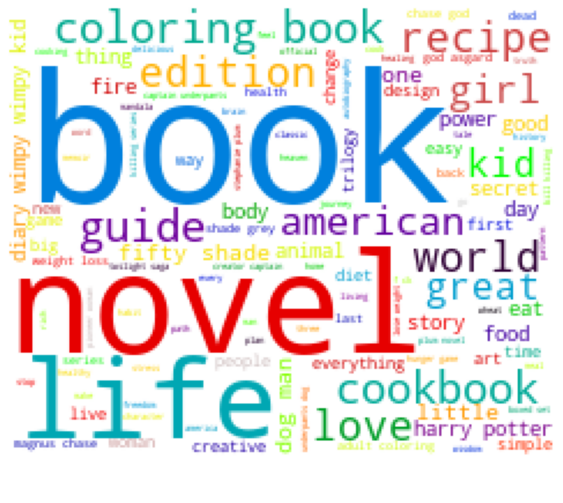

In [84]:
word_cloud = WordCloud(background_color='white', 
                       max_words=1000,
                       colormap='nipy_spectral_r',
                       mask=books_mask).generate(bag_of_words)
plt.figure(figsize=(16,9))
plt.axis('off')
plt.imshow(word_cloud);

# CONCLUSION

 - Between 2009 and 2019, Amazon had more Non Fiction books in the best sellers list than Fiction books. There was a total of  (345) 54.16% Non Fiction books and (292) 45.58% Fiction books.


 - 2019 had the highest number of best selling books which were Non Fiction while 2009 had more Fiction books which were best sellers.


 - Majority of the best selling books (459) had a hardcover type, followed by the books which had paperbacks (445).
 
 - Based on the number of times their books were listed as a best selling books between 2009 and 2019, and regardless of genre, Rick Riordan, Suzanne Collins and Jeff Kinney were top best selling authors from the top 10 most occuring authors. Each of them occuring 18, 16, and 15 times respectively.
 

 - Based on the number of times each book was listed as a best selling book between 2009 and 2019, Generally, regardless of Genre, Publication Manual of the American Psychology Assscoiation, 6th Edition, StrengthsFinder 2.0, 7 Habits of Highly Effective People were the top best selling books from the to 10 most occuring books. Each of them appearing 11, 11, and 10 times respectively.
 

 - There is no relationship between price and reviews.
 

 - Between 2009 and 2019, Fiction books had more reviews than Non Fiction books
 

 - Average price of books started decreasing from 2014, increased in 2018, and then decreased again in 2019. 


 - The top 20 authors with higher user ratings had more than 4.5 stars in User Ratings.
 

 - Delia Owens, Alex Michaelides, Michelle Obama, Robert Kiyosaki and Paula Hawkins were the top 5 in the top 20 best selling autors with higher number of reviews. Delia Owens had the maximum number of reviews which was about 340,000 reviews and was very much higher than other authors reviews.
 

 - Top 5 authors with highest priced books are American Psychiatric Association, Hall H Pearson Education, George R.R Martin, and Jay-Z.
 
   American Psychiatric Association is an outlier having the maximum average price of 144 dollars.
   

 - Based on Genre and number of book appearances:
 
  - the top five best selling authors in Fiction were Rick Riordan, Suzanne Collins, Jeff Kinney, Dr.Seuss, and Stephen Meyer.
  
  - the top five best selling authors in Non Fiction were Gallup, Malcom Gladwell, American Psychological Association, The College Board, and Gary Chapman.
  

 - Fiction writers like Rick Riordan, Suzanne Collins, Jeff Kinney, and John Grisham were the best selling or sought after authors.
 

 - The top 10 books based on user ratings had more than 4.5 stars in their user ratings.
 
 
 - The top best selling books based on user ratings had When the Crawdads Sing, The Silent Patient, Becoming, and The Nightingale: A Novel as the top 4 books.

   Meanwhile When The Crawdads Sing is that top outlier with the highest average number of reviews of about 344811 reviews.


 - Based on Genre and Number of Reviews:

  - The top five Fiction Books with the highest number of reviews were Where the Crawdads Sing, The Silent Patient, The Nightingale: A Novel, The Alchemist, 25th Anniversary: A Fable About Following Your Dreams.
  
  - While in the Non Fiction books, the Top five were Becoming, Rich Dad Poor Dad: What the Rich Teach Their Kids About Money That the Poor and Middle Class Do Not!, The Four Agreements: A pratical Guide to Personal Freedom (ATolfec Wisdom Book), Atomic Hbaits, An Easy & Proven Way to Build Habits & Break Bad Ones, and The Subtle Art of Not Giving a Fuuck: A Counterintutive Approach to Living A Good Life.
  

 - The overall top best selling books based on appearance were self development books.